# Importing libraries needed

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
import scipy.stats as stat
import pylab
from sklearn.preprocessing import scale
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

## Reading the data, visualizing it and checking basic properties before merging

### Reading the first (train) data.

In [2]:
train=pd.read_csv('train.csv')
train.shape

(456548, 9)

In [3]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


From the above display we can observe:

-No null values in train data

-All numeric data present

In [5]:
train.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
dtype: int64

The above display shows there are no constant columnns present in train data. Might check for quasi constant columns later.

In [6]:
train.checkout_price.describe() #should not be negative

count    456548.000000
mean        332.238933
std         152.939723
min           2.970000
25%         228.950000
50%         296.820000
75%         445.230000
max         866.270000
Name: checkout_price, dtype: float64

In [7]:
train.base_price.describe()  #should not be negative

count    456548.000000
mean        354.156627
std         160.715914
min          55.350000
25%         243.500000
50%         310.460000
75%         458.870000
max         866.270000
Name: base_price, dtype: float64

In [8]:
train.week.describe()  #should not be negative

count    456548.000000
mean         74.768771
std          41.524956
min           1.000000
25%          39.000000
50%          76.000000
75%         111.000000
max         145.000000
Name: week, dtype: float64

### Reading the fulfilment_center data.

In [9]:
warehouse=pd.read_csv('fulfilment_center_info.csv')
warehouse.shape

(77, 5)

In [10]:
warehouse.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [11]:
warehouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


From the above display we can observe:

-No null values in the warehouse data

In [12]:
warehouse.nunique()

center_id      77
city_code      51
region_code     8
center_type     3
op_area        30
dtype: int64

In [13]:
warehouse.op_area.describe()#should not be negative

count    77.000000
mean      3.985714
std       1.106406
min       0.900000
25%       3.500000
50%       3.900000
75%       4.400000
max       7.000000
Name: op_area, dtype: float64

### Reading the meal data.

In [14]:
meal=pd.read_csv('meal_info.csv')
meal.shape

(51, 3)

In [15]:
meal.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [16]:
meal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


From the above display we can observe:

-No null values

In [17]:
meal.nunique()

meal_id     51
category    14
cuisine      4
dtype: int64

## Merging the dataframes to get better insights

In [18]:
train_ware=pd.merge(train,warehouse,how='outer')
train_ware.shape

(456548, 13)

In [19]:
train_ware.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,647,56,TYPE_C,2.0


In [20]:
train_ware.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
dtypes: float64(3), int64(9), object(1)
memory usage: 48.8+ MB


In [21]:
#forming the total data with all the three sets
data=pd.merge(train_ware,meal,how='outer')
data.shape

(456548, 15)

In [22]:
data.sample(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
438136,1377672,84,61,2577,280.33,280.33,0,0,122,473,77,TYPE_A,4.5,Starters,Thai
58424,1154095,41,53,1248,153.26,153.26,0,0,14,590,56,TYPE_A,3.8,Beverages,Indian
150367,1007697,85,24,1109,203.73,311.43,0,0,971,614,85,TYPE_B,3.6,Rice Bowl,Indian
75013,1186828,78,89,1062,185.33,184.33,0,0,311,703,56,TYPE_A,4.8,Beverages,Italian
355938,1080714,143,10,1216,292.03,411.34,1,0,366,590,56,TYPE_B,6.3,Pasta,Italian
416444,1487086,88,124,1878,243.53,292.03,1,0,82,590,56,TYPE_C,4.0,Starters,Thai
435360,1052823,91,67,2577,292.03,292.03,0,0,285,638,56,TYPE_B,7.0,Starters,Thai
367314,1241269,23,72,1198,183.36,320.13,0,0,94,638,56,TYPE_C,3.9,Extras,Thai
147195,1093095,77,41,1727,298.79,447.23,1,0,242,590,56,TYPE_C,1.9,Rice Bowl,Indian
284648,1405203,22,99,2444,618.86,618.86,0,0,69,596,71,TYPE_A,4.5,Seafood,Continental


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 456548 entries, 0 to 456547
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
 9   city_code              456548 non-null  int64  
 10  region_code            456548 non-null  int64  
 11  center_type            456548 non-null  object 
 12  op_area                456548 non-null  float64
 13  category               456548 non-null  object 
 14  cuisine                456548 non-nu

In [24]:
data.head(10)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1018704,2,55,1885,135.83,152.29,0,0,323,647,56,TYPE_C,2.0,Beverages,Thai
2,1196273,3,55,1885,132.92,133.92,0,0,96,647,56,TYPE_C,2.0,Beverages,Thai
3,1116527,4,55,1885,135.86,134.86,0,0,163,647,56,TYPE_C,2.0,Beverages,Thai
4,1343872,5,55,1885,146.50,147.50,0,0,215,647,56,TYPE_C,2.0,Beverages,Thai
5,1493612,6,55,1885,146.53,146.53,0,0,285,647,56,TYPE_C,2.0,Beverages,Thai
6,1110832,7,55,1885,145.53,146.53,0,0,148,647,56,TYPE_C,2.0,Beverages,Thai
7,1461167,8,55,1885,146.53,145.53,0,0,135,647,56,TYPE_C,2.0,Beverages,Thai
8,1102364,9,55,1885,134.83,134.83,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai
9,1018130,10,55,1885,144.56,143.56,0,0,175,647,56,TYPE_C,2.0,Beverages,Thai


## Data Preprocessing

### Checking for null values.

In [25]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

No null values present.

### Checking for constant columns.

In [26]:
data.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

No constant columns.

### Checking fro quasi constant columns.

In [27]:
#checking which are quasi constant columns
quasi_const={}
for i in data.columns:
    dic=data[i].value_counts(normalize=True).to_dict()
    for j in dic.keys():
        if dic[j]>0.90:
            quasi_const[i]=dic[j]
        break
quasi_const

{'emailer_for_promotion': 0.9188475253423517}

In [28]:
#there is one quasi constant column but we cannot drop it rightaway tit can be dropped after EDA if of no use

### Duplicate data.

In [29]:
transposed= data.T

In [30]:
transposed.shape

(15, 456548)

In [31]:
#transposed.duplicated().sum()

In [32]:
data.duplicated().sum()

0

No duplicate data present.

## Exploratory Data Analysis

In [33]:
data.shape

(456548, 15)

In [34]:
data.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [35]:
data.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

cuisine:Cuisine of the meal(Indian,Italian,Thai,Continental)

<AxesSubplot:xlabel='cuisine', ylabel='count'>

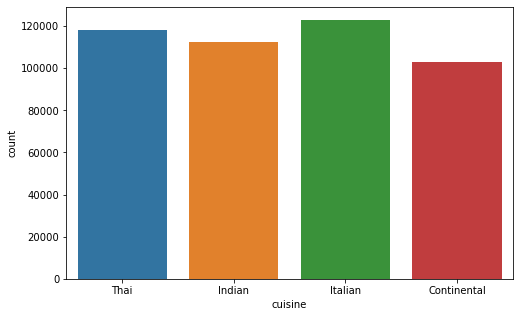

In [36]:
# finding the frequency of different types of cuisines in the data
plt.figure(figsize=(8,5))
sns.countplot(x='cuisine',data=data,)

In [37]:
data['cuisine'].value_counts().reset_index()

,index,cuisine
0,Italian,122925
1,Thai,118216
2,Indian,112612
3,Continental,102795


Italian cuisines are the most frequent throughout the data, it is also seen that there is not much difference in the frequency aong the cuisines.

center_type:Anonymized Center Type

<AxesSubplot:xlabel='center_type', ylabel='count'>

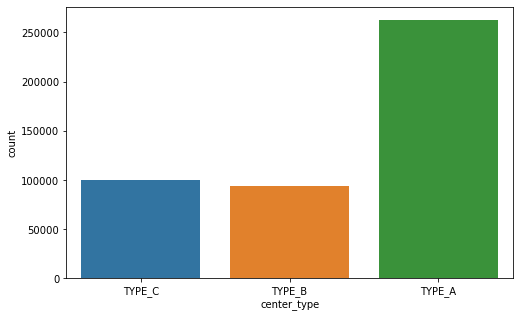

In [38]:
#finding the frequency of different center types present in the data
plt.figure(figsize=(8,5))
sns.countplot(x='center_type',data=data)

In [39]:
data['center_type'].value_counts().reset_index()

,index,center_type
0,TYPE_A,262881
1,TYPE_C,99593
2,TYPE_B,94074


Type A center is most frequent in the data. 

category:Type of meal

<AxesSubplot:xlabel='category', ylabel='count'>

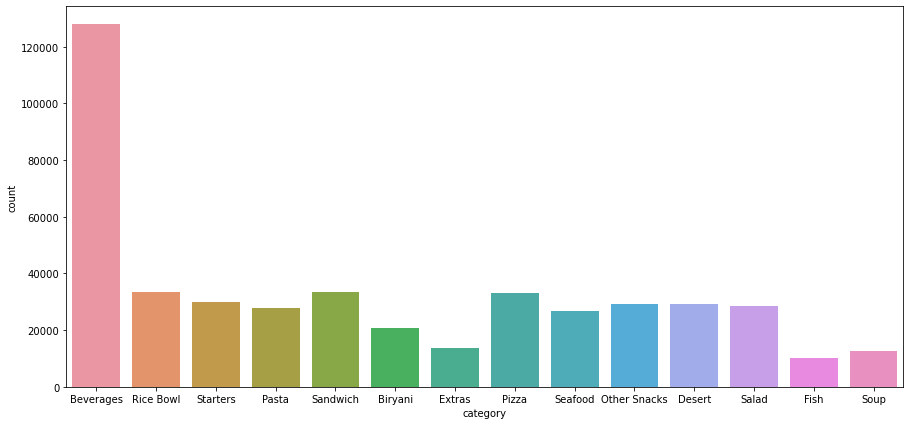

In [40]:
#frequency of the different types of meals present in the dataset
plt.figure(figsize=(15,7))
sns.countplot(x='category',data=data)

In [41]:
data['category'].value_counts().reset_index()

,index,category
0,Beverages,127890
1,Rice Bowl,33408
2,Sandwich,33291
3,Pizza,33138
4,Starters,29941
5,Other Snacks,29379
6,Desert,29294
7,Salad,28559
8,Pasta,27694
9,Seafood,26916


Beverages has the highest frequency among the different type of meals and has a significant frequency difference from other meal types which lie around a similar range(10000-24000)

emailer_for_promotion:Emailer sent for promotion of meals

<AxesSubplot:xlabel='emailer_for_promotion', ylabel='count'>

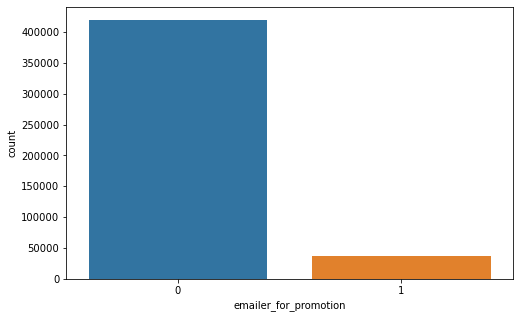

In [42]:
#how many meals are sent for promotion and how many are not
plt.figure(figsize=(8,5))
sns.countplot(x='emailer_for_promotion',data=data)

Most of the meals were not sent for promotion.

homepage_featured:Meal featured at homepage.

<AxesSubplot:xlabel='homepage_featured', ylabel='count'>

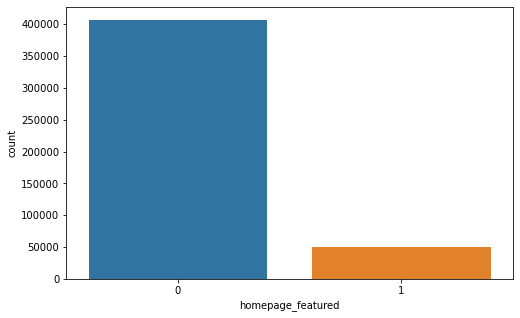

In [43]:
#how many meals are present in the homepage and how many are not
plt.figure(figsize=(8,5))
sns.countplot(x='homepage_featured',data=data)

We can observe that only 10% of the meals from the ordered meals are featured in the homepage.

region code:unique code for region

<AxesSubplot:xlabel='region_code', ylabel='count'>

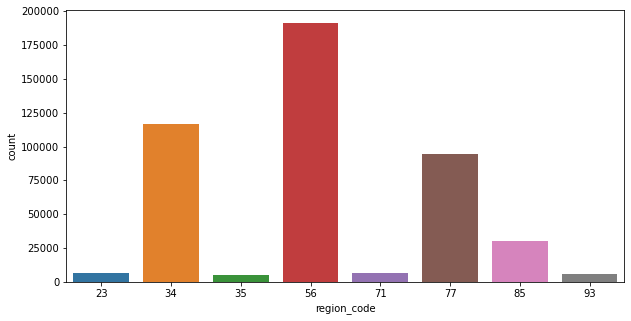

In [44]:
#finding frequency of each region
plt.figure(figsize=(10,5))
sns.countplot(x='region_code',data=data)

In [45]:
data['region_code'].value_counts().reset_index()

,index,region_code
0,56,191228
1,34,116713
2,77,94612
3,85,30283
4,23,6434
5,71,6293
6,93,5721
7,35,5264


There are entries from 8 regions in the dataset.
There have been most entries from regions with region codes: 56,34,77 and some what of 85 in the data. All other regions have less than 10000 counts.

city code: unique code for city

<AxesSubplot:xlabel='city_code', ylabel='count'>

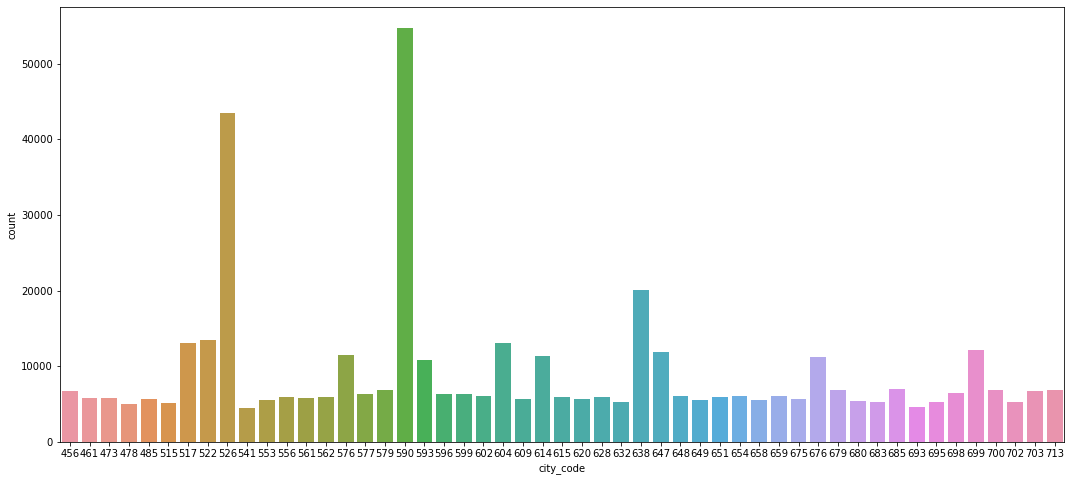

In [46]:
#finding frequency of each city
plt.figure(figsize=(18,8))
sns.countplot(x='city_code',data=data)

There are data from 51 cities in the dataset.
The city with code 590 is most frequent in the data set and is followed by 526 and 638 all other cities have frequency of less than 20000.

Numerical data:

In [47]:
data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


In [48]:
#function to find the lower bound and upper bound of a particular distribution
def outlier(data):
    outliers=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lbound_val=q1-(1.5*iqr)
    ubound_val=q3+(1.5*iqr)
    return lbound_val,ubound_val

num orders:Orders count

<AxesSubplot:xlabel='num_orders'>

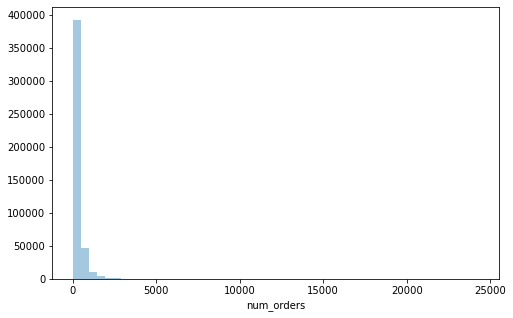

In [49]:
#distribution of number of orders
plt.figure(figsize=(8,5))
sns.distplot(data['num_orders'],kde=False)

In [50]:
data['num_orders'].describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

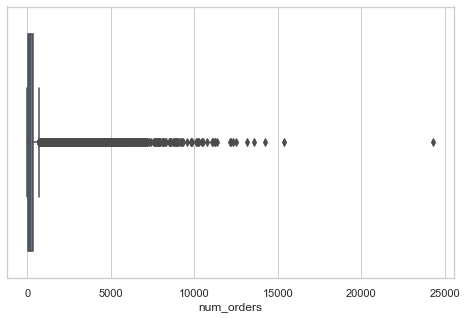

In [51]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["num_orders"])

In [52]:
skew(data['num_orders'])

6.929943296742628

In [53]:
lbound,ubound=outlier(data['num_orders'])
print('lower bound:',lbound,'upper bound:',ubound)#pritning upper and lower bound

lower bound: -351.0 upper bound: 729.0


In [54]:
data[(data.num_orders>ubound) | (data.num_orders<lbound)].shape[0]#number of outliers

32937

There are a lot of outliers, we cannot remove all of them as it may cause data loss, so I take another approach by extending the bounds.

In [55]:
#function to find the lower bound and upper bound of a particular distribution
def outlier_t(data):
    outliers=[]
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)
    iqr=q3-q1
    lbound_val=q1-(3*iqr)
    ubound_val=q3+(3*iqr)
    return lbound_val,ubound_val

In [56]:
lbound,ubound=outlier_t(data['num_orders'])
print('lower bound:',lbound,'upper bound:',ubound)#pritning upper and lower bound

lower bound: -756.0 upper bound: 1134.0


In [57]:
data[(data.num_orders>ubound) | (data.num_orders<lbound)].shape[0]#number of outliers

13245

In [58]:
data=data[(data.num_orders<ubound)&(data.num_orders>lbound)]#removing the outliers

In [59]:
skew(data['num_orders'])

1.6473063185997323

<AxesSubplot:xlabel='num_orders'>

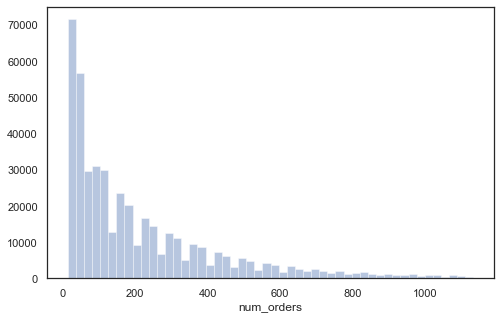

In [60]:
#distribution after removal of outliers
plt.figure(figsize=(8,5))
sns.set_theme(style="white")
sns.distplot(data['num_orders'],kde=False)

After removal of the outliers the data is much less skewed, but is still positively skewed denoting most of the orders are in lower numbers.

op_area: Area of operation(in km^2)

<AxesSubplot:xlabel='op_area'>

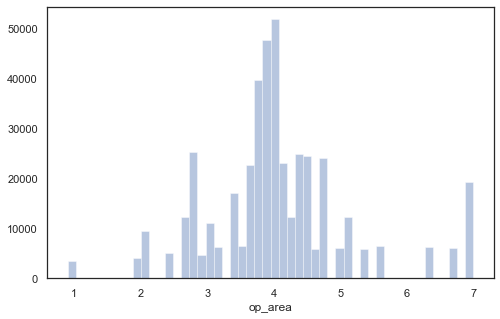

In [61]:
#distribution of operational area
plt.figure(figsize=(8,5))
sns.distplot(data['op_area'],kde=False)

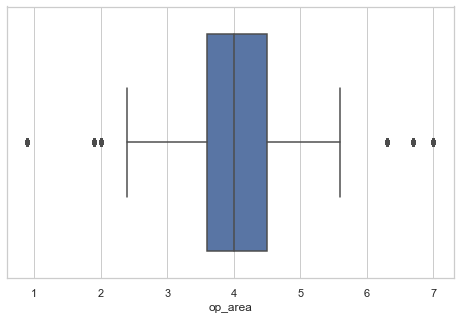

In [62]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["op_area"])

In [63]:
data['op_area'].describe()

count    443180.000000
mean          4.061144
std           1.078288
min           0.900000
25%           3.600000
50%           4.000000
75%           4.500000
max           7.000000
Name: op_area, dtype: float64

In [64]:
skew(data['op_area'])

0.6594018770183249

In [65]:
data.shape

(443180, 15)

In [66]:
lbound,ubound=outlier(data['op_area'])
print('lower bound:',lbound,'upper bound:',ubound)#pritning upper and lower bound

lower bound: 2.25 upper bound: 5.85


In [67]:
data[~(data.op_area<ubound)&(data.op_area>lbound)].shape[0]

31535

There are too many outliers in op_area these might be having a trend as there are so many outliers and removing them will cause data loss and we can lose data with trend.

In [68]:
data['op_area'].max()

7.0

In [69]:
data['op_area'].min()

0.9

checkout_price:final price including discount,taxes & delivery charges

<AxesSubplot:xlabel='checkout_price'>

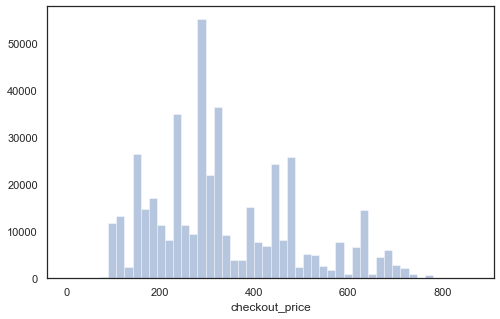

In [70]:
#distribution of checkout price
plt.figure(figsize=(8,5))
sns.set_theme(style="white")
sns.distplot(data['checkout_price'],kde=False)

In [71]:
skew(data['checkout_price'])

0.6434815280504635

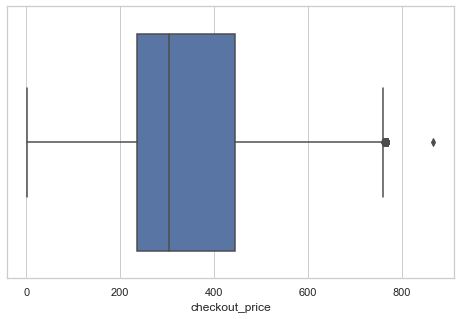

In [72]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["checkout_price"])

In [73]:
lbound,ubound=outlier(data['checkout_price'])
print('lower bound:',lbound,'upper bound:',ubound)#pritning upper and lower bound

lower bound: -78.41999999999999 upper bound: 759.4200000000001


In [74]:
data[~(data.checkout_price<ubound)&(data.checkout_price>lbound)].shape[0]#number of outliers

628

In [75]:
data=data[(data.checkout_price<ubound)&(data.checkout_price>lbound)]#removing the outliers

<AxesSubplot:xlabel='checkout_price'>

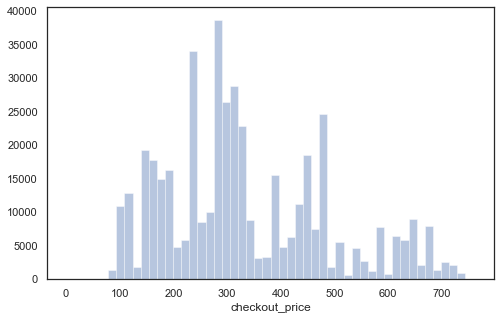

In [76]:
#distribution after removal of outliers
plt.figure(figsize=(8,5))
sns.set_theme(style="white")
sns.distplot(data['checkout_price'],kde=False)

base_price:base price of a meal

<AxesSubplot:xlabel='base_price'>

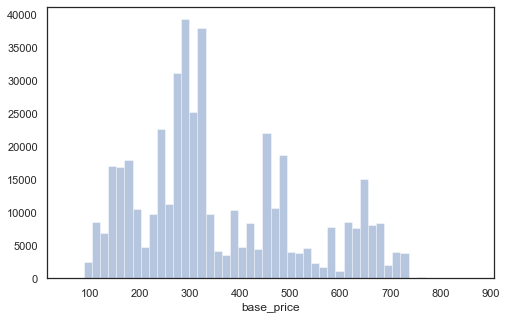

In [77]:
plt.figure(figsize=(8,5))
sns.distplot(data['base_price'],kde=False)

In [78]:
skew(data['base_price'])

0.610394939962277

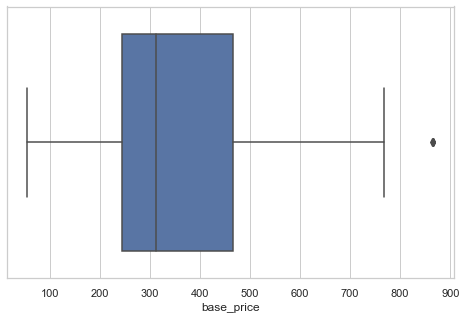

In [79]:
plt.figure(figsize=(8,5))
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=data["base_price"])

In [80]:
lbound,ubound=outlier(data['base_price'])
print('lower bound:',lbound,'upper bound:',ubound)#pritning upper and lower bound

lower bound: -89.61999999999998 upper bound: 798.78


In [81]:
data[~(data.base_price<ubound)&(data.base_price>lbound)]['base_price'].shape[0]#number of outliers

6

In [82]:
data=data[(data.base_price<ubound)&(data.base_price>lbound)]#removing outliers

<AxesSubplot:xlabel='base_price'>

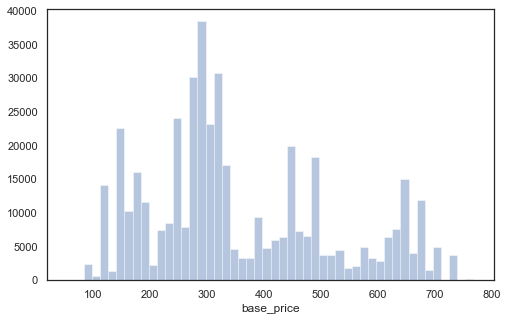

In [83]:
#distribution after removal of outliers
plt.figure(figsize=(8,5))
sns.set_theme(style="white")
sns.distplot(data['base_price'],kde=False)

Multivariate Analysis

In [84]:
count=data.groupby('cuisine')['num_orders'].mean().reset_index()
count

,cuisine,num_orders
0,Continental,159.436502
1,Indian,166.089484
2,Italian,290.492426
3,Thai,228.694145


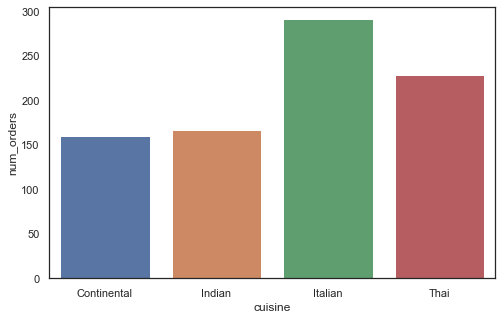

In [85]:
#average number of orders of each cuisine
plt.figure(figsize=(8,5))
sns.barplot(count['cuisine'],count['num_orders'])
plt.show()

In [86]:
count=data.groupby('center_type')['num_orders'].sum().reset_index()
count

,center_type,num_orders
0,TYPE_A,54719803
1,TYPE_B,22401437
2,TYPE_C,17490858


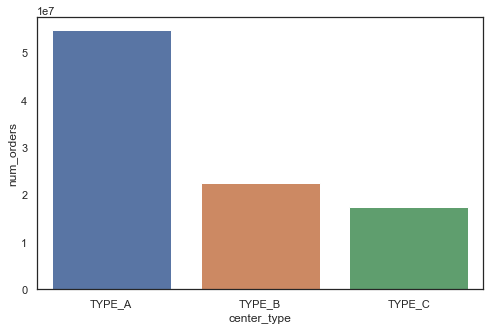

In [87]:
#total number of orders of each center type
plt.figure(figsize=(8,5))
sns.barplot(count['center_type'],count['num_orders'])
plt.show()

In [88]:
count=data.groupby('center_type')['num_orders'].mean().reset_index()
count

,center_type,num_orders
0,TYPE_A,214.652279
1,TYPE_B,249.876598
2,TYPE_C,178.527329


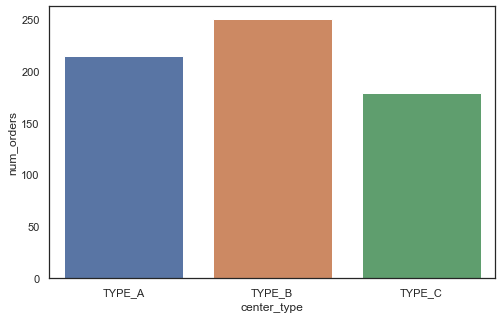

In [89]:
#average number of orders of each center type
plt.figure(figsize=(8,5))
sns.barplot(count['center_type'],count['num_orders'])
plt.show()

In [90]:
group=data.groupby(['center_id','center_type']).num_orders.sum().reset_index()['center_type'].value_counts()
group

TYPE_A    43
TYPE_C    19
TYPE_B    15
Name: center_type, dtype: int64

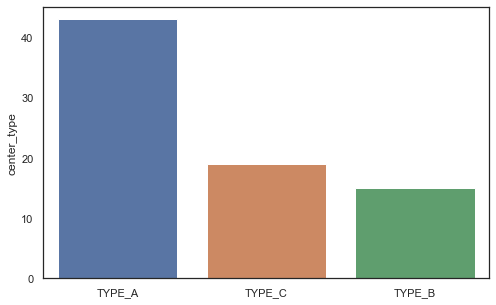

In [91]:
#number of centers in each center type it is observable that center TYPE A has most centers as it is most frequent
plt.figure(figsize=(8,5))
sns.barplot(x=group.index,y=group)
plt.show()

In [92]:
group=data.groupby('center_id')['num_orders'].sum().sort_values(ascending=False).reset_index().head(20)
group

,center_id,num_orders
0,10,2186732
1,13,2153076
2,52,2127372
3,43,2091689
4,11,1984245
5,67,1888189
6,137,1864818
7,108,1755076
8,174,1687484
9,104,1678578


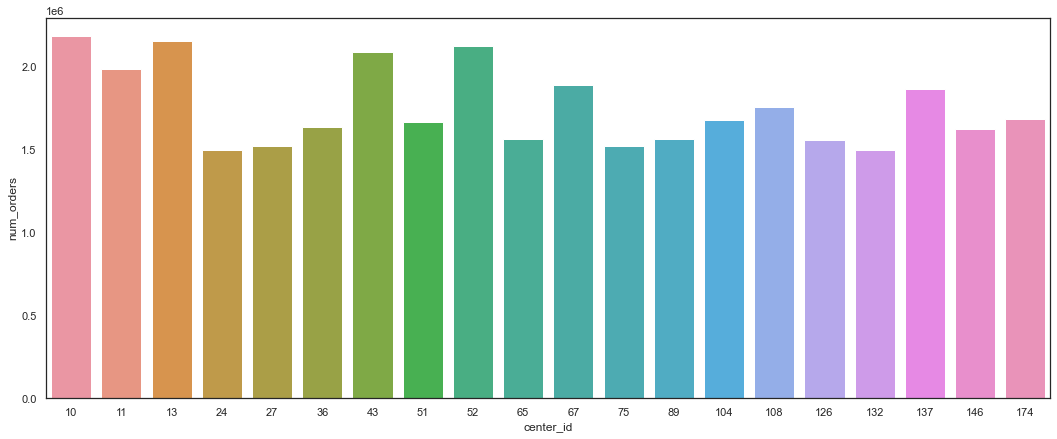

In [93]:
#total number of orders of each center, this doesn't provide with any trend
plt.figure(figsize=(18,7))
sns.barplot(group['center_id'],group['num_orders'])
plt.show()

In [94]:
group=data.groupby('category').agg({'base_price':'mean'}).reset_index()
group

,category,base_price
0,Beverages,229.492818
1,Biryani,460.962293
2,Desert,466.559037
3,Extras,205.054989
4,Fish,596.939319
5,Other Snacks,273.409480
6,Pasta,428.045511
7,Pizza,643.433312
8,Rice Bowl,342.157156
9,Salad,301.172501


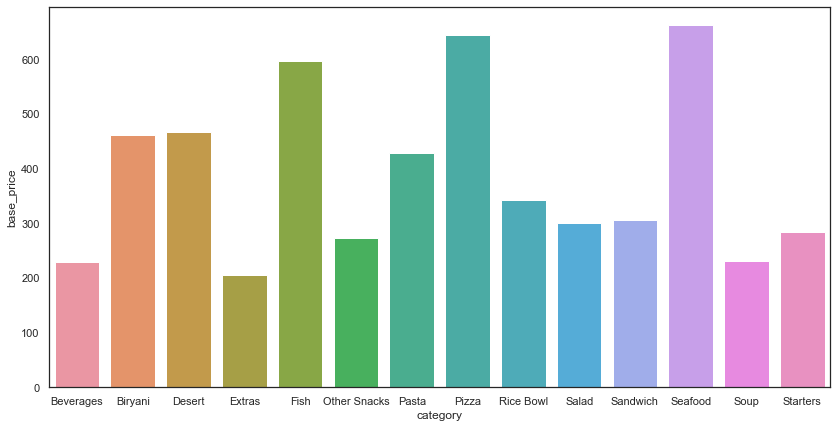

In [95]:
#average price of each category meals
plt.figure(figsize=(14,7))
sns.barplot(group['category'],group['base_price'])
plt.show()

In [96]:
count=data.groupby('category')['num_orders'].sum().sort_values(ascending=False).reset_index()
count

,category,num_orders
0,Beverages,31853701
1,Rice Bowl,13203279
2,Sandwich,11409769
3,Salad,9318501
4,Pizza,6869614
5,Other Snacks,4648126
6,Starters,4622603
7,Extras,3915792
8,Seafood,2648762
9,Desert,1940754


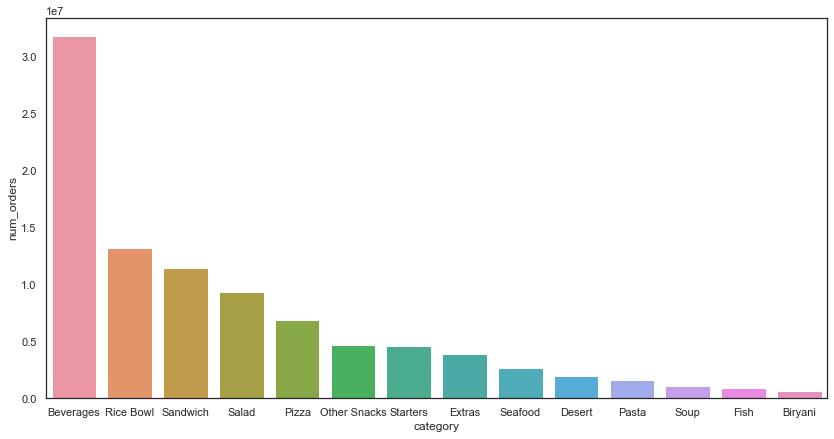

In [97]:
#total number of orders of each category type
plt.figure(figsize=(14,7))
sns.barplot(count['category'],count['num_orders'])
plt.show()

In [98]:
count=data.groupby('category')['num_orders'].mean().sort_values(ascending=False).reset_index()
count

,category,num_orders
0,Rice Bowl,443.048186
1,Sandwich,375.914899
2,Salad,337.028500
3,Extras,289.908344
4,Beverages,259.975034
5,Pizza,209.580023
6,Other Snacks,158.633699
7,Starters,154.498763
8,Seafood,100.912908
9,Fish,85.595268


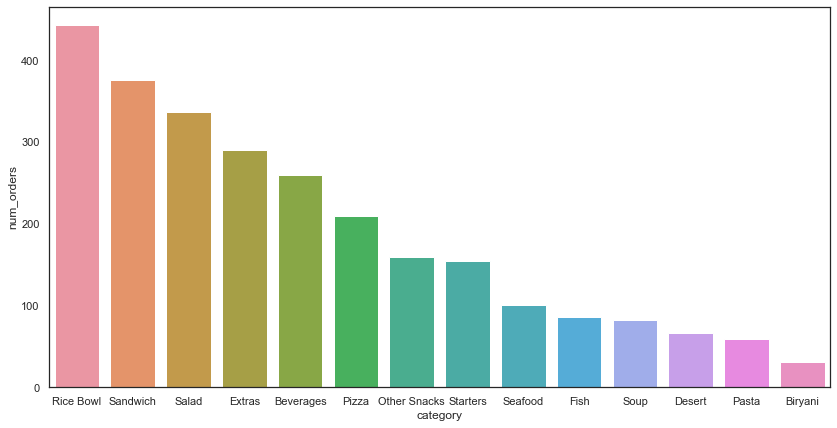

In [99]:
#average number of orders of each category type
plt.figure(figsize=(14,7))
sns.barplot(count['category'],count['num_orders'])
plt.show()

The average number of orders category wise and the total number of orders show different trends in the most ordered categories. In both the cases Biriyani is the least ordered.

In [100]:
count=data.groupby('region_code')['num_orders'].sum().sort_values(ascending=False).reset_index()
count

,region_code,num_orders
0,56,44018694
1,34,21432869
2,77,17986848
3,85,6735507
4,71,1456259
5,23,1326784
6,93,987193
7,35,667944


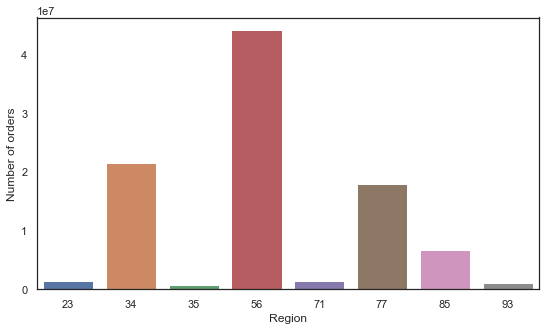

In [101]:
#total number of orders in each region
plt.figure(figsize=(9,5))
sns.barplot(x='region_code',y='num_orders',data=count)
plt.xlabel('Region')
plt.ylabel('Number of orders')
plt.show()

In [102]:
count=data.groupby('region_code')['num_orders'].mean().reset_index()
count

,region_code,num_orders
0,23,211.372312
1,34,186.403571
2,35,127.518900
3,56,241.392760
4,71,243.806965
5,77,193.348755
6,85,231.055779
7,93,178.033003


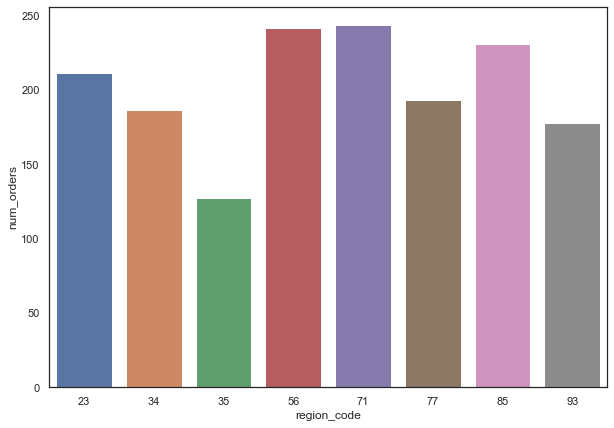

In [103]:
#average number of orders in each region
plt.figure(figsize=(10,7))
sns.barplot(count['region_code'],count['num_orders'])
plt.show()

In [104]:
count=data.groupby('city_code')['num_orders'].sum().sort_values(ascending=False).reset_index()

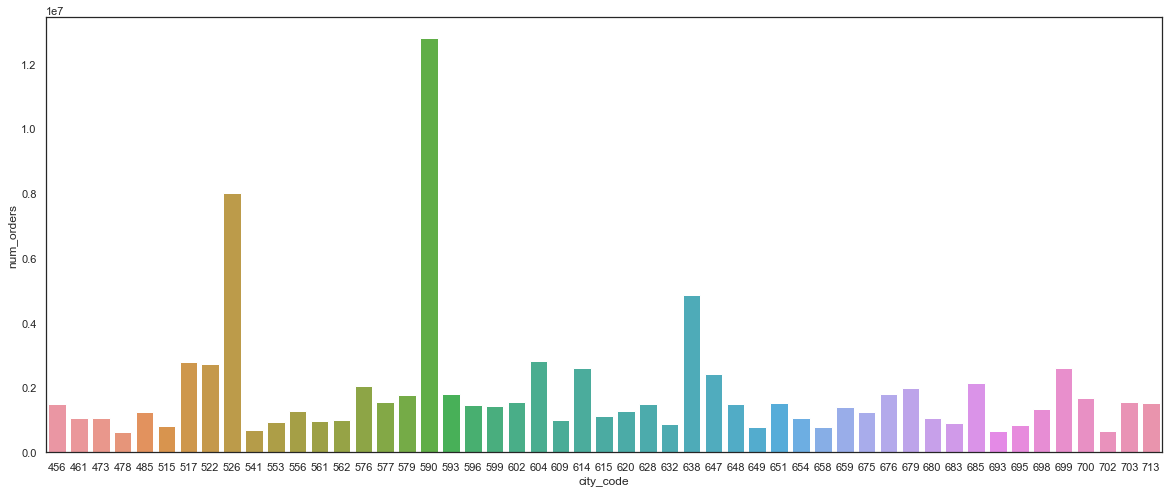

In [105]:
#total number of oders from each city
plt.figure(figsize=(20,8))
sns.barplot(count['city_code'],count['num_orders'])
plt.show()

In [106]:
count=data.groupby('city_code')['num_orders'].mean().sort_values(ascending=False).reset_index()

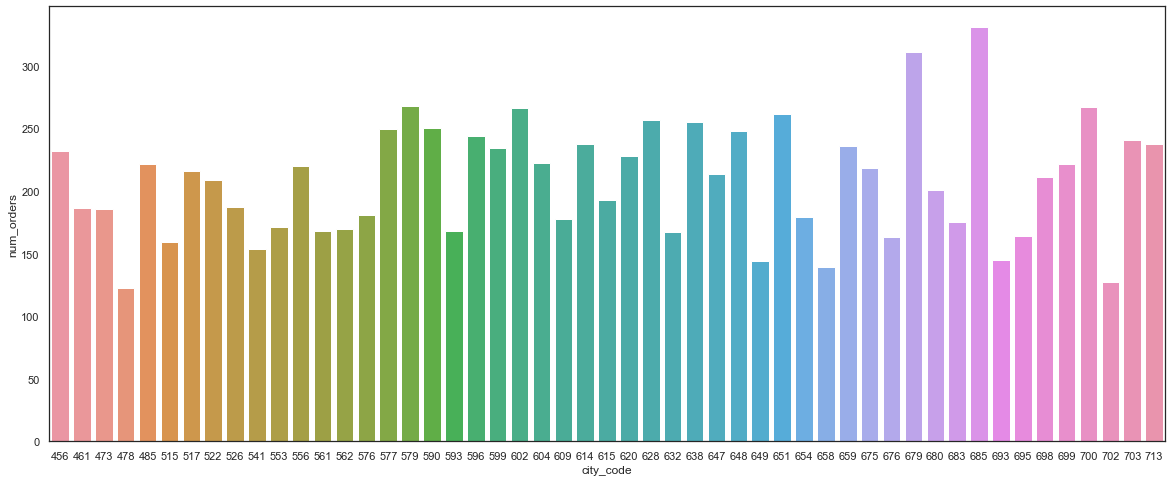

In [107]:
#average number of orders from each city
plt.figure(figsize=(20,8))
sns.barplot(count['city_code'],count['num_orders'])
plt.show()

In [108]:
df_cnt = data.groupby('op_area').agg({'num_orders':'mean'}).reset_index()
df_cnt

,op_area,num_orders
0,0.9,120.627812
1,1.9,109.483959
2,2.0,145.097875
3,2.4,122.872822
4,2.7,215.120328
5,2.8,164.938899
6,2.9,165.982162
7,3.0,172.026067
8,3.2,182.697663
9,3.4,178.589299


<AxesSubplot:xlabel='op_area', ylabel='num_orders'>

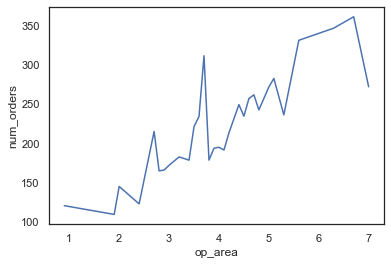

In [109]:
#change of average number of orders with operational area
sns.lineplot(data=df_cnt,y='num_orders',x='op_area')

In [110]:
df_cnt = data.groupby('op_area').agg({'num_orders':'sum'}).reset_index()
df_cnt

,op_area,num_orders
0,0.9,412909
1,1.9,443629
2,2.0,1365371
3,2.4,613504
4,2.7,2624468
5,2.8,4154481
6,2.9,772315
7,3.0,1907253
8,3.2,1149351
9,3.4,3030839


<AxesSubplot:xlabel='op_area', ylabel='num_orders'>

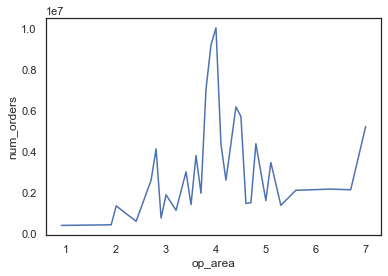

In [111]:
#change of total number of orders with operational area
sns.lineplot(data=df_cnt,y='num_orders',x='op_area')

We might find some trend of number of orders if we divide the operational area in different categories.

In [112]:
count = data.groupby('week').agg({'num_orders':'mean'}).reset_index()
count

,week,num_orders
0,1,230.953456
1,2,240.072920
2,3,214.949349
3,4,227.704570
4,5,205.435298
...,...,...
140,141,212.172134
141,142,207.037665
142,143,208.290590
143,144,219.009559


<AxesSubplot:xlabel='week', ylabel='num_orders'>

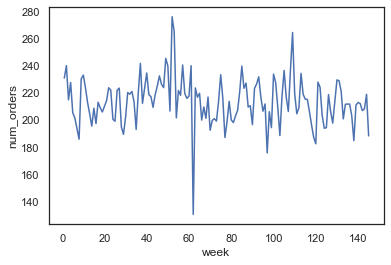

In [113]:
sns.lineplot(data=count,y='num_orders',x='week')

In [114]:
count = data.groupby('week').agg({'num_orders':'sum'}).reset_index()
count

,week,num_orders
0,1,654984
1,2,678206
2,3,611101
3,4,642810
4,5,554059
...,...,...
140,141,679163
141,142,659622
142,143,677361
143,144,710248


<AxesSubplot:xlabel='week', ylabel='num_orders'>

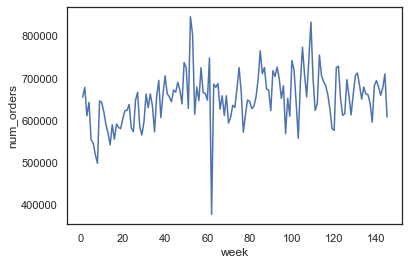

In [115]:
sns.lineplot(data=count,y='num_orders',x='week')

No trend with orders from different weeks found. Lets find different time intervals from weeks.

In [116]:
data['quarter']=(data['week']/13).astype('int64')
data['quarter'].nunique()

12

In [117]:
data['quarter'] = data['quarter'].map({0:'Q1',
                         1:'Q2',
                         2:'Q3',
                         3:'Q4',
                         4:'Q1',
                         5:'Q2',
                         6:'Q3',
                         7:'Q4',
                         8:'Q1',
                         9:'Q2',
                         10:'Q3',
                         11:'Q4'})

In [118]:
#frequency of each quarter in the dataset
data['quarter'].value_counts().reset_index()

,index,quarter
0,Q3,120664
1,Q2,118306
2,Q1,113926
3,Q4,89650


In [119]:
count = data.groupby('quarter').agg({'num_orders':'sum'}).reset_index()
count

,quarter,num_orders
0,Q1,25185138
1,Q2,24415497
2,Q3,25579280
3,Q4,19432183


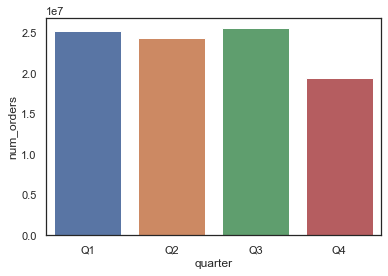

In [120]:
#total number of orders in each quarter
sns.barplot(count['quarter'],count['num_orders'])
plt.show()

In [121]:
data['year']=(data['week']/52).astype('int64')
data['year'].nunique()

3

In [122]:
data['year'] = data['year'].map({0:'Y1',
                         1:'Y2',
                         2:'Y3'})

In [123]:
#frequency of each year in dataset
data['year'].value_counts().reset_index()

,index,year
0,Y2,161805
1,Y1,147344
2,Y3,133397


In [124]:
count = data.groupby('year').agg({'num_orders':'sum'}).reset_index()
count

,year,num_orders
0,Y1,31806569
1,Y2,34497542
2,Y3,28307987


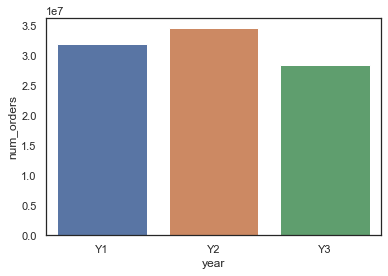

In [125]:
#annual orders
sns.barplot(count['year'],count['num_orders'])
plt.show()

In [126]:
data['month']=(data['week']/4).astype('int64')
data['month']=data['month']+1

In [127]:
data['month']=data['month'].map({1:'Jan',2:'Feb', 3:'Mar', 4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec',
        13:'Jan',14:'Feb',15:'Mar',16:'April',17:'May',18:'June',19:'July',20:'Aug',21:'Sept',22:'Oct',23:'Nov',24:'Dec',
        25:'Jan',26:'Feb',27:'Mar',28:'April',29:'May',30:'June',31:'July',32:'Aug',33:'Sept',34:'Oct',35:'Nov',36:'Dec',
        37:'Jan'})

In [128]:
#frequency of each month
data['month'].value_counts().reset_index()

,index,month
0,Jan,39645
1,Nov,37650
2,Dec,37491
3,July,37062
4,Oct,37053
5,Aug,36894
6,Sept,36867
7,May,36438
8,June,36297
9,Mar,35968


In [129]:
count=data.groupby('month')['num_orders'].mean().reset_index()
count

,month,num_orders
0,April,214.193230
1,Aug,203.106223
2,Dec,218.552719
3,Feb,221.816395
4,Jan,214.531114
5,July,211.000621
6,June,206.868033
7,Mar,220.621413
8,May,212.810527
9,Nov,210.781514


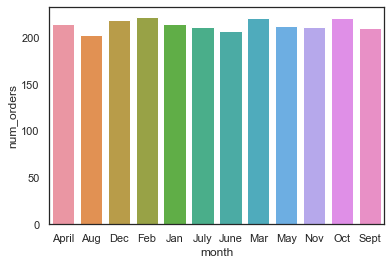

In [130]:
#average number of orders each month
sns.barplot(count['month'],count['num_orders'])
plt.show()

In [131]:
count=data.groupby('month')['num_orders'].sum().reset_index()
count

,month,num_orders
0,April,7650768
1,Aug,7493401
2,Dec,8193760
3,Feb,7866053
4,Jan,8505086
5,July,7820105
6,June,7508689
7,Mar,7935311
8,May,7754390
9,Nov,7935924


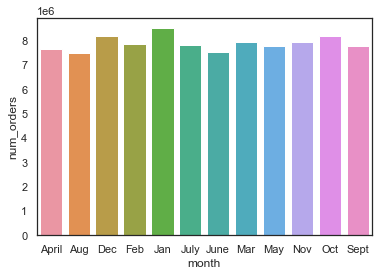

In [132]:
#total number of monthly orders
sns.barplot(count['month'],count['num_orders'])
plt.show()

No difference in trend of number of orders in total and average monthly orders.

In [133]:
data['compare_price'] = data['checkout_price'] - data['checkout_price'].shift(1)
#creating a column with difference in price with each order

In [134]:
data.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
quarter                  0
year                     0
month                    0
compare_price            1
dtype: int64

In [135]:
data=data.fillna(0)

<AxesSubplot:xlabel='compare_price'>

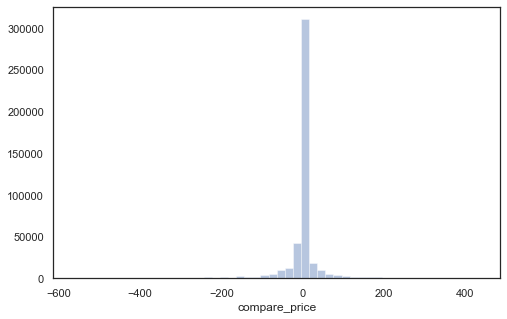

In [136]:
#distribution after removal of outliers
plt.figure(figsize=(8,5))
sns.set_theme(style="white")
sns.distplot(data['compare_price'],kde=False)

<AxesSubplot:xlabel='num_orders', ylabel='compare_price'>

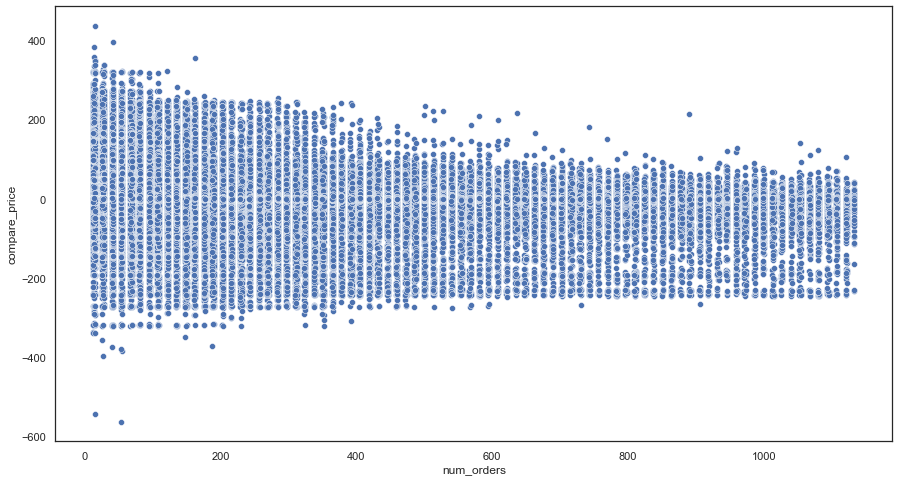

In [137]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='num_orders',y='compare_price')

There is no direct trend of price comparison and number of orders but might be helpful with other features.

In [138]:
data['checkout_price'].median()

303.61

In [139]:
data['checkout_price'].mode()

0    290.03
dtype: float64

In [140]:
data['base_price'].median()

311.43

In [141]:
data['base_price'].mode()

0    292.03
dtype: float64

In [142]:
np.mean(data['checkout_price'])

335.37484288698454

In [143]:
data['discount']=data['base_price']-data['checkout_price']#difference of price to find discount
data['discount_given'] = [1 if x>0 else 0 for x in (data['base_price']-data['checkout_price'])]#discount given or not

In [144]:
data['discount'].describe()

count    442546.000000
mean         21.029643
std          47.791476
min        -185.300000
25%          -1.000000
50%           0.000000
75%           2.000000
max         561.600000
Name: discount, dtype: float64

<AxesSubplot:xlabel='discount'>

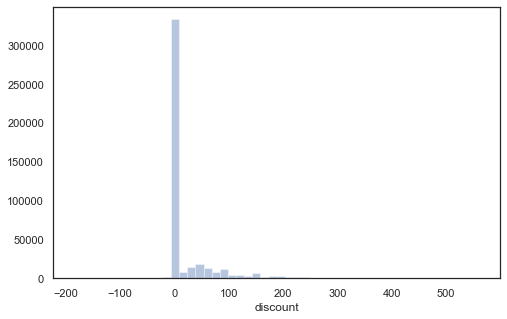

In [145]:
plt.figure(figsize=(8,5))
sns.distplot(data['discount'],kde=False)

In [146]:
skew(data['discount'])

2.715449671431949

In [147]:
data['discount'].mode()

0    0.0
dtype: float64

<AxesSubplot:xlabel='num_orders', ylabel='discount'>

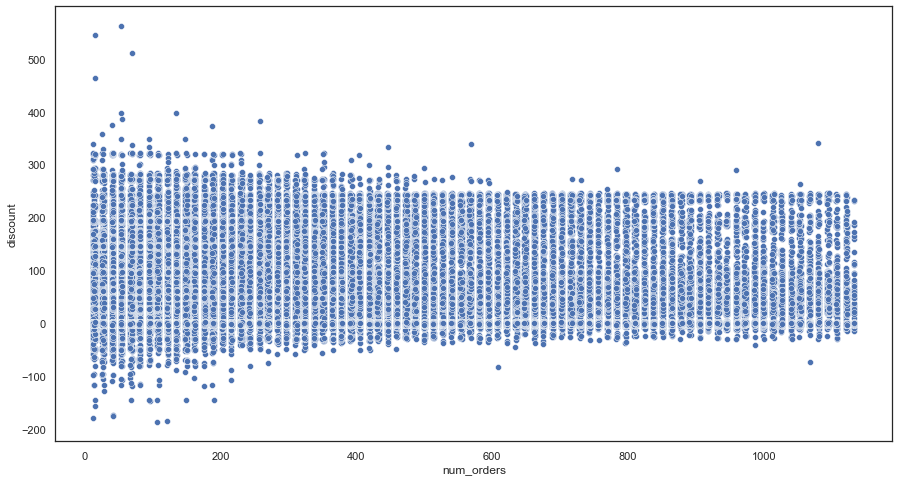

In [148]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.scatterplot(data=data,x='num_orders',y='discount')

There is no trend with of discount with number of orders.

<AxesSubplot:xlabel='base_price', ylabel='checkout_price'>

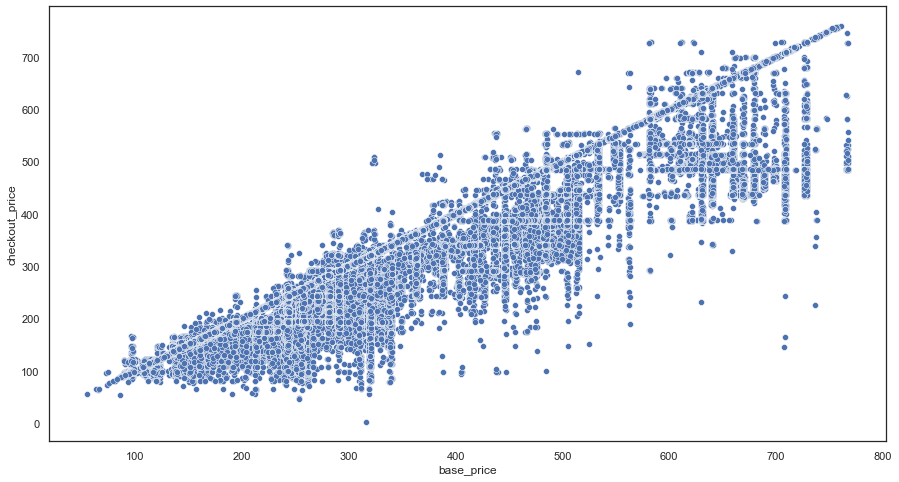

In [149]:
sns.set_style('white')
plt.figure(figsize=(15,8))
sns.scatterplot(data['base_price'],data['checkout_price'])

In [150]:
data['base_price'].corr(data['checkout_price'])

0.9546715604453976

The two prices are very much correlated.

In [151]:
data.nunique()

id                       442546
week                        145
center_id                    77
meal_id                      51
checkout_price             1984
base_price                 1901
emailer_for_promotion         2
homepage_featured             2
num_orders                  250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
quarter                       4
year                          3
month                        12
compare_price              7784
discount                   5033
discount_given                2
dtype: int64

In [152]:
group=data.groupby('cuisine').agg({'base_price':'mean'}).reset_index()
group

,cuisine,base_price
0,Continental,555.977873
1,Indian,365.064533
2,Italian,301.698377
3,Thai,226.836564


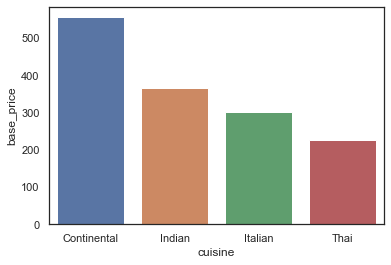

In [153]:
#price of different cuisines
sns.barplot(group['cuisine'],group['base_price'])
plt.show()

Continental cuisines are the costliest cuisines. Thai cuisines are mostly low in cost and Indian and Italian are moderately costly.

In [154]:
group=data.groupby('cuisine').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,cuisine,base_price,num_orders
0,Continental,555.977873,159.436502
1,Indian,365.064533,166.089484
2,Italian,301.698377,290.492426
3,Thai,226.836564,228.694145


<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

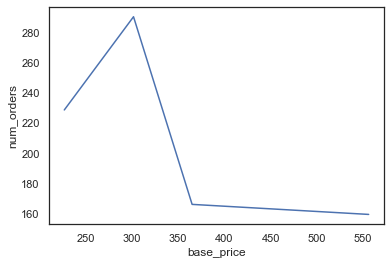

In [155]:
#cuisine price with orders trend
sns.lineplot(data=group,y='num_orders',x='base_price')

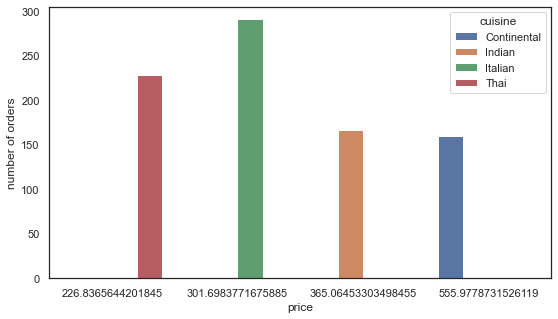

In [156]:
plt.figure(figsize=(9,5))
sns.barplot(x='base_price',y='num_orders',hue='cuisine',data=group)
plt.xlabel('price')
plt.ylabel('number of orders')
plt.show()

In [157]:
group=data.groupby('cuisine').agg({'num_orders':'sum'}).reset_index()
group

,cuisine,num_orders
0,Continental,16211663
1,Indian,18102259
2,Italian,34173529
3,Thai,26124647


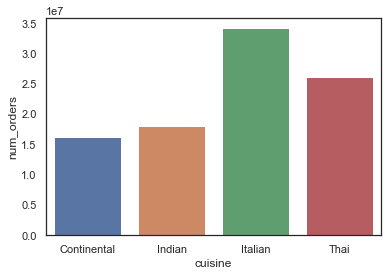

In [158]:
#total number of orders of each cuisine
sns.barplot(group['cuisine'],group['num_orders'])
plt.show()

In [159]:
group=data.groupby('cuisine').agg({'discount':'mean','num_orders':'mean'}).reset_index()
group

,cuisine,discount,num_orders
0,Continental,41.123735,159.436502
1,Indian,21.163777,166.089484
2,Italian,13.314506,290.492426
3,Thai,10.960856,228.694145


<AxesSubplot:xlabel='discount', ylabel='num_orders'>

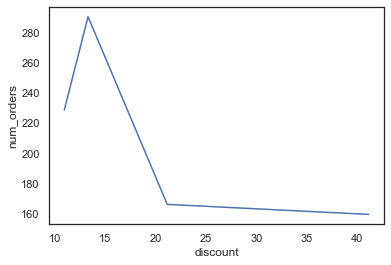

In [160]:
#trend of average discount and number of orders in each cuisine type
sns.lineplot(data=group,y='num_orders',x='discount')

Pretty much same trend like base price with cuisine orders.

In [161]:
group=data.groupby('category').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,category,base_price,num_orders
0,Beverages,229.492818,259.975034
1,Biryani,460.962293,30.651402
2,Desert,466.559037,66.250905
3,Extras,205.054989,289.908344
4,Fish,596.939319,85.595268
5,Other Snacks,273.409480,158.633699
6,Pasta,428.045511,59.137142
7,Pizza,643.433312,209.580023
8,Rice Bowl,342.157156,443.048186
9,Salad,301.172501,337.028500


<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

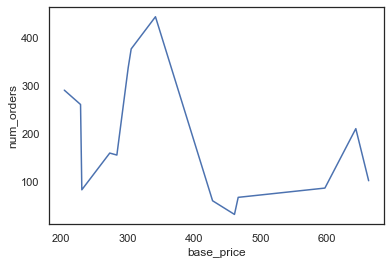

In [162]:
#trend of average number of orders with average base price of each category
sns.lineplot(data=group,y='num_orders',x='base_price')

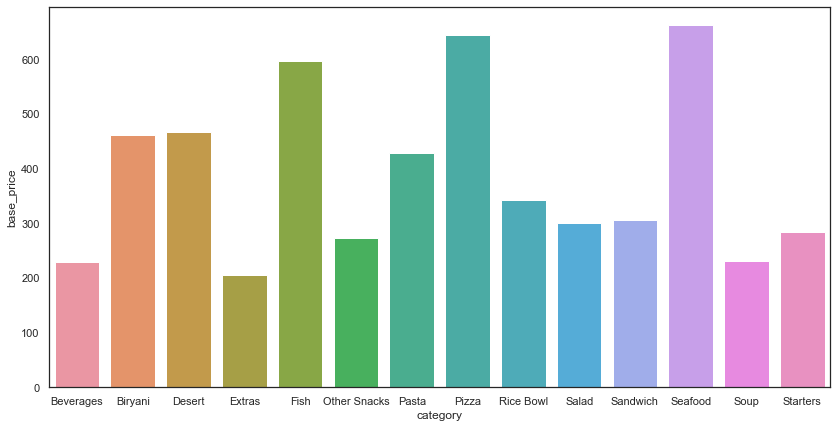

In [163]:
#average price of different categories
plt.figure(figsize=(14,7))
sns.barplot(group['category'],group['base_price'])
plt.show()

In [164]:
group=data.groupby('center_type').agg({'base_price':'sum','num_orders':'sum'}).reset_index()
group

,center_type,base_price,num_orders
0,TYPE_A,9.101837e+07,54719803
1,TYPE_B,3.262967e+07,22401437
2,TYPE_C,3.407735e+07,17490858


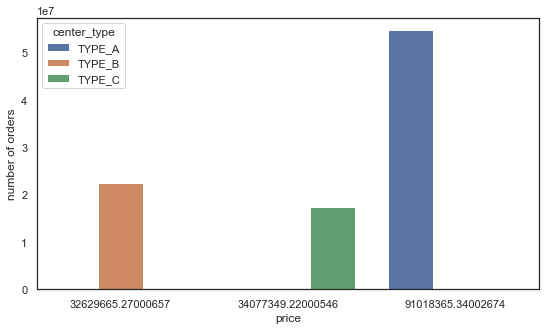

In [165]:
#total number of orders with average price of meals from different fulfilment centers
plt.figure(figsize=(9,5))
sns.barplot(x='base_price',y='num_orders',hue='center_type',data=group)
plt.xlabel('price')
plt.ylabel('number of orders')
plt.show()

In [166]:
group=data.groupby('center_type').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,center_type,base_price,num_orders
0,TYPE_A,357.042579,214.652279
1,TYPE_B,363.967265,249.876598
2,TYPE_C,347.823882,178.527329


<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

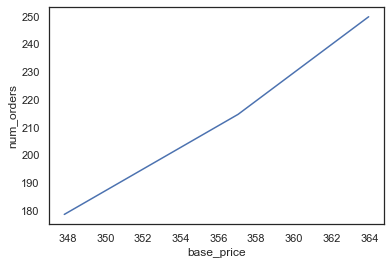

In [167]:
#trend of number of orders with price of meals from different fulfilment centers
sns.lineplot(data=group,y='num_orders',x='base_price')

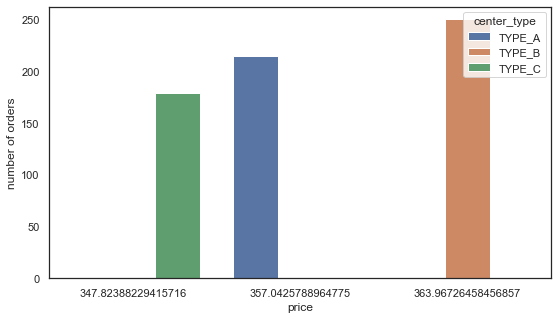

In [168]:
#average number of orders with average price of meals from different fulfilment centers
plt.figure(figsize=(9,5))
sns.barplot(x='base_price',y='num_orders',hue='center_type',data=group)
plt.xlabel('price')
plt.ylabel('number of orders')
plt.show()

In [169]:
group=data.groupby('center_type').agg({'discount':'sum','num_orders':'sum'}).reset_index()
group

,center_type,discount,num_orders
0,TYPE_A,5350945.96,54719803
1,TYPE_B,1799430.57,22401437
2,TYPE_C,2156208.08,17490858


<AxesSubplot:xlabel='discount', ylabel='num_orders'>

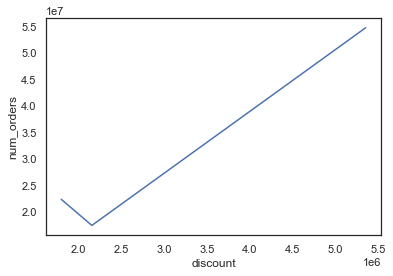

In [170]:
#trend of total number of orders with total discount of meals of different fulfilment centers
sns.lineplot(data=group,y='num_orders',x='discount')

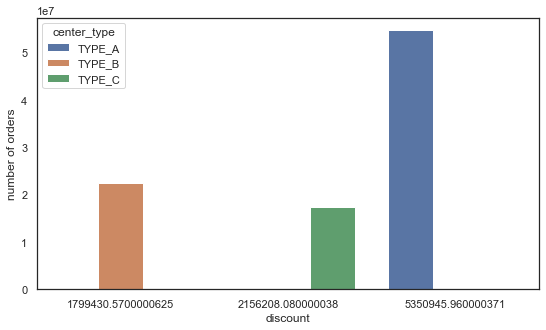

In [171]:
#total number of orders with total discount of meals of different fulfilment centers
plt.figure(figsize=(9,5))
sns.barplot(x='discount',y='num_orders',hue='center_type',data=group)
plt.xlabel('discount')
plt.ylabel('number of orders')
plt.show()

In [172]:
group=data.groupby('center_type').agg({'discount':'mean','num_orders':'mean'}).reset_index()
group

,center_type,discount,num_orders
0,TYPE_A,20.990440,214.652279
1,TYPE_B,20.071730,249.876598
2,TYPE_C,22.008187,178.527329


<AxesSubplot:xlabel='discount', ylabel='num_orders'>

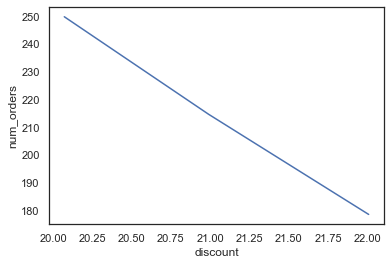

In [173]:
#trend of average number of orders with average discount given in meals from different fulfilment centers
sns.lineplot(data=group,y='num_orders',x='discount')

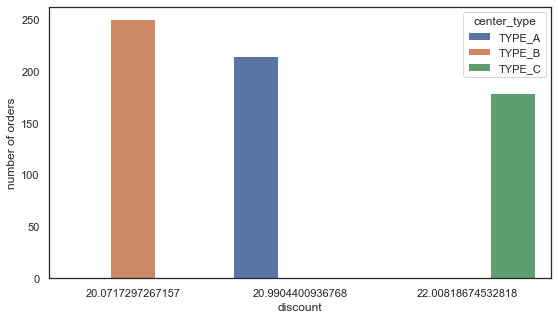

In [174]:
#average number of orders with average discount given in meals from different fulfilment centers
plt.figure(figsize=(9,5))
sns.barplot(x='discount',y='num_orders',hue='center_type',data=group)
plt.xlabel('discount')
plt.ylabel('number of orders')
plt.show()

In [175]:
group=data.groupby('region_code').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,region_code,base_price,num_orders
0,23,351.573511,211.372312
1,34,355.768719,186.403571
2,35,354.316966,127.518900
3,56,357.356339,241.392760
4,71,363.399712,243.806965
5,77,356.040694,193.348755
6,85,352.843309,231.055779
7,93,363.015598,178.033003


<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

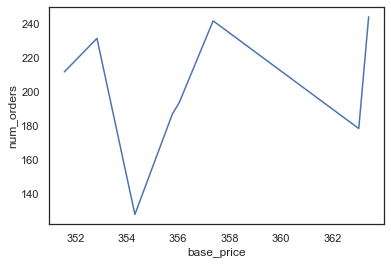

In [176]:
#trend of average number of orders with base price of meals ordered in different regions
sns.lineplot(data=group,y='num_orders',x='base_price')

In [177]:
group=data.groupby('city_code').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,city_code,base_price,num_orders
0,456,360.450893,231.768370
1,461,356.141727,186.527113
2,473,360.192504,186.056663
3,478,345.914318,122.872822
4,485,355.666771,221.464401
5,515,340.493139,159.321862
6,517,354.030468,216.512127
7,522,357.083338,208.657790
8,526,354.588818,187.308230
9,541,347.935197,153.917472


<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

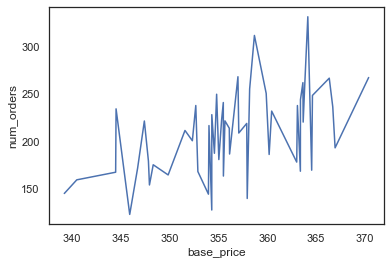

In [178]:
#trend of average number of orders with base price of meals ordered in different cities
sns.lineplot(data=group,y='num_orders',x='base_price')

In [179]:
group=data.groupby('week').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,week,base_price,num_orders
0,1,352.264267,230.953456
1,2,351.607837,240.072920
2,3,350.957506,214.949349
3,4,351.845731,227.704570
4,5,352.864401,205.435298
...,...,...,...
140,141,358.146367,212.172134
141,142,357.456965,207.037665
142,143,363.383130,208.290590
143,144,363.144320,219.009559


<AxesSubplot:xlabel='base_price', ylabel='num_orders'>

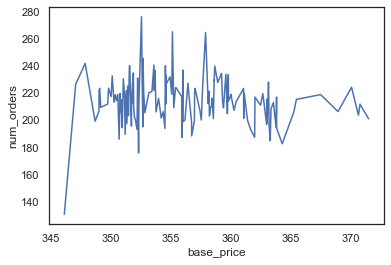

In [180]:
#trend of average number of orders with base price of meals ordered in different weeks
sns.lineplot(data=group,y='num_orders',x='base_price')

In [181]:
np.mean(data['num_orders'])

213.79042630596592

In [182]:
group=data.groupby('discount_given').agg({'num_orders':'sum'}).reset_index()
group

,discount_given,num_orders
0,0,43914259
1,1,50697839


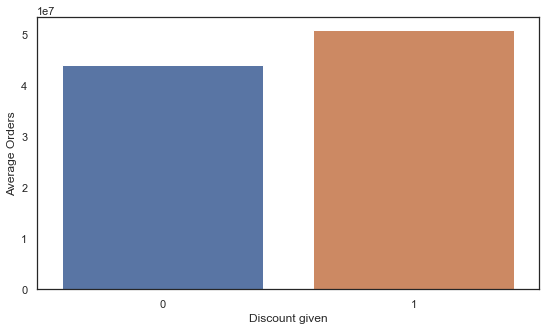

In [183]:
#more orders when discount is given
plt.figure(figsize=(9,5))
sns.barplot(group['discount_given'],group['num_orders'])
plt.xlabel('Discount given')
plt.ylabel('Average Orders')
plt.show()

In [184]:
group=data.groupby('discount_given').agg({'num_orders':'mean'}).reset_index()
group

,discount_given,num_orders
0,0,196.960257
1,1,230.879195


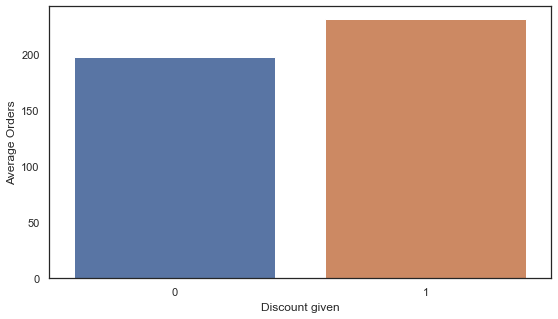

In [185]:
#similar trend where discount is given average number of orders is more
plt.figure(figsize=(9,5))
sns.barplot(group['discount_given'],group['num_orders'])
plt.xlabel('Discount given')
plt.ylabel('Average Orders')
plt.show()

In [186]:
group=data.groupby('emailer_for_promotion').agg({'base_price':'sum','num_orders':'sum'}).reset_index()
group

,emailer_for_promotion,base_price,num_orders
0,0,1.429920e+08,83599442
1,1,1.473338e+07,11012656


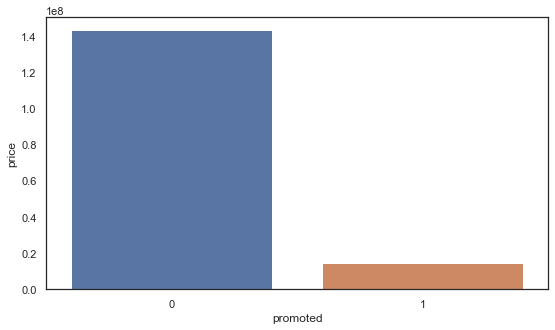

In [187]:
#owing to the frequency most of the price of meals which are promoted is less than those which are not
plt.figure(figsize=(9,5))
sns.barplot(group['emailer_for_promotion'],group['base_price'])
plt.xlabel('promoted')
plt.ylabel('price')
plt.show()

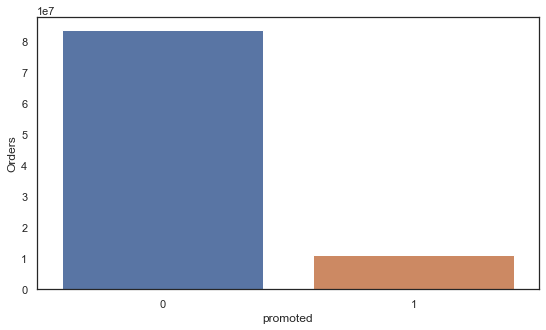

In [188]:
#owing to the frequency most of the orders of meals which are promoted is less than those which are not
plt.figure(figsize=(9,5))
sns.barplot(group['emailer_for_promotion'],group['num_orders'])
plt.xlabel('promoted')
plt.ylabel('Orders')
plt.show()

In [189]:
group=data.groupby('emailer_for_promotion').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,emailer_for_promotion,base_price,num_orders
0,0,347.837093,203.360932
1,1,468.365618,350.086022


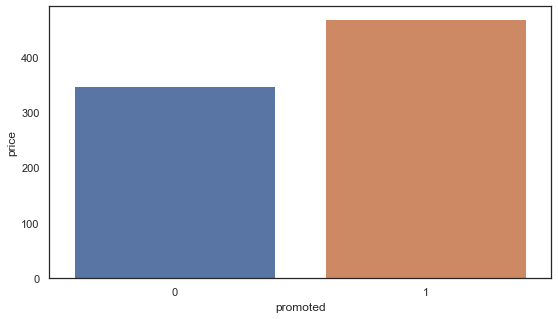

In [190]:
#the average price of meals promoted is more than those not
plt.figure(figsize=(9,5))
sns.barplot(group['emailer_for_promotion'],group['base_price'])
plt.xlabel('promoted')
plt.ylabel('price')
plt.show()

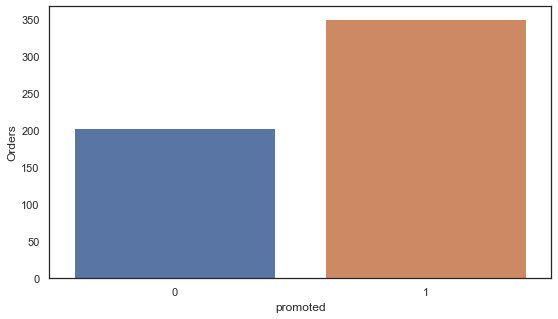

In [191]:
#the average orders of meals promoted is more than those not
plt.figure(figsize=(9,5))
sns.barplot(group['emailer_for_promotion'],group['num_orders'])
plt.xlabel('promoted')
plt.ylabel('Orders')
plt.show()

In [192]:
group=data.groupby('homepage_featured').agg({'base_price':'sum','num_orders':'sum'}).reset_index()
group

,homepage_featured,base_price,num_orders
0,0,1.407175e+08,79622251
1,1,1.700792e+07,14989847


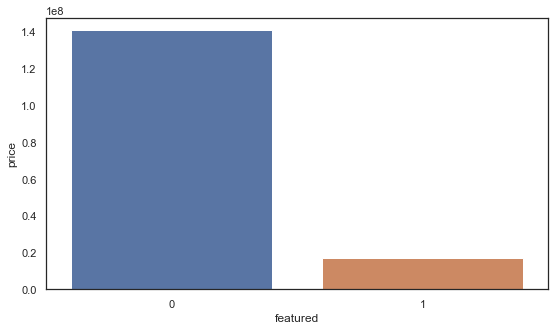

In [193]:
#owing to the frequency most of the price of meals which are featured in homepage is less than those which are not
plt.figure(figsize=(9,5))
sns.barplot(group['homepage_featured'],group['base_price'])
plt.xlabel('featured')
plt.ylabel('price')
plt.show()

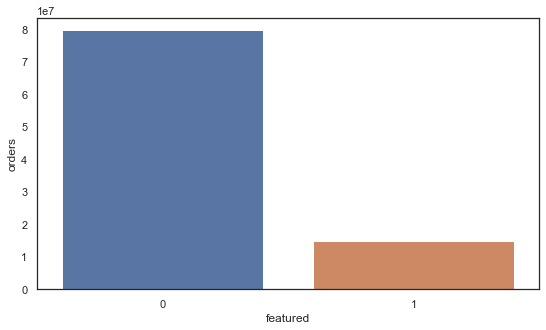

In [194]:
#owing to the frequency most of the orders of meals which are featured in homepage is less than those which are not
plt.figure(figsize=(9,5))
sns.barplot(group['homepage_featured'],group['num_orders'])
plt.xlabel('featured')
plt.ylabel('orders')
plt.show()

In [195]:
group=data.groupby('homepage_featured').agg({'base_price':'mean','num_orders':'mean'}).reset_index()
group

,homepage_featured,base_price,num_orders
0,0,351.889537,199.109885
1,1,398.732179,351.420631


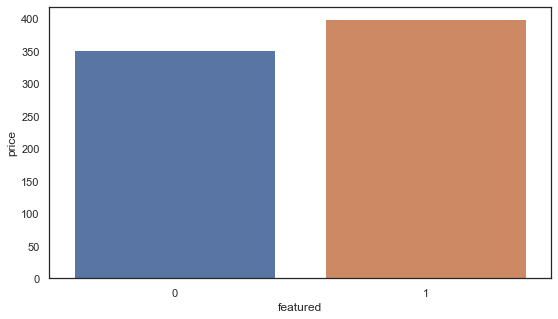

In [196]:
#the average price of meals featured in homepage is more than those not
plt.figure(figsize=(9,5))
sns.barplot(group['homepage_featured'],group['base_price'])
plt.xlabel('featured')
plt.ylabel('price')
plt.show()

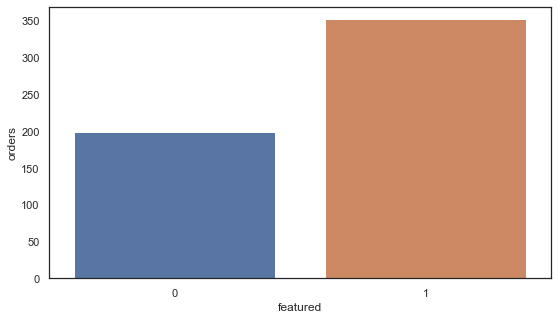

In [197]:
#the average orders of meals featured in homepage is more than those not
plt.figure(figsize=(9,5))
sns.barplot(group['homepage_featured'],group['num_orders'])
plt.xlabel('featured')
plt.ylabel('orders')
plt.show()

<AxesSubplot:>

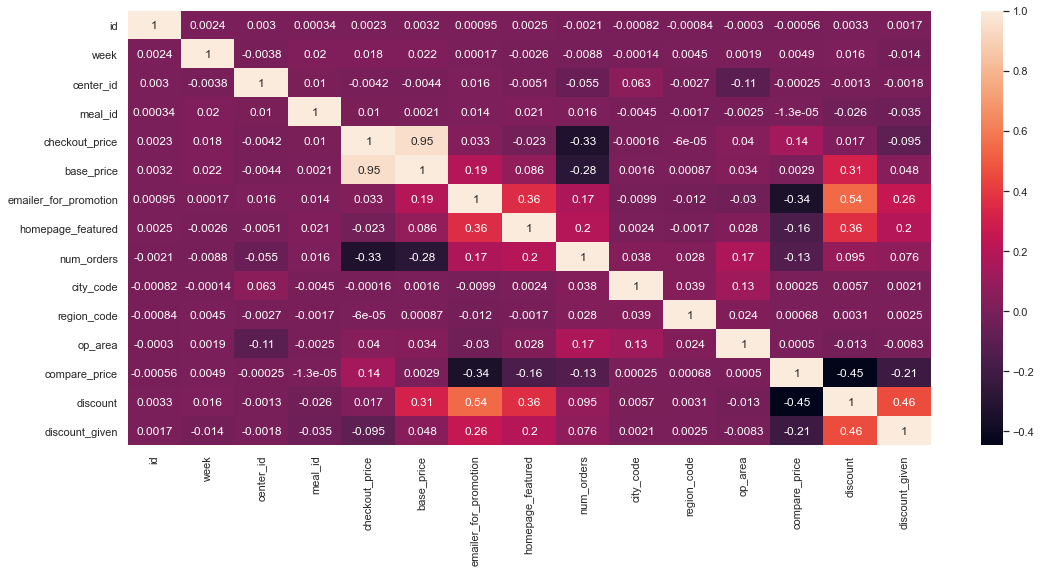

In [198]:
plt.figure(figsize=(18,8))
sns.heatmap(data.corr(),annot=True)

From the Exploratory data analysis it can be observed that there are certain regions, cities, centers present in the data from where most of the orders are made but when calculating in average number of orders they do not lead. We find trends in number of orders with different columns.

## Data Splitting

In [199]:
x_train,x_val,y_train,y_val=train_test_split(data,data['num_orders'],test_size=.30)
print(x_train.shape,y_train.shape)
print(x_val.shape,y_val.shape)

(309782, 21) (309782,)
(132764, 21) (132764,)


In [200]:
x_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type,op_area,category,cuisine,quarter,year,month,compare_price,discount,discount_given
395173,1172672,48,23,2664,332.71,332.71,0,0,526,698,...,TYPE_A,3.4,Salad,Italian,Q4,Y1,Jan,0.00,0.0,0
165863,1492993,46,157,2640,281.33,282.33,0,0,258,609,...,TYPE_A,4.1,Starters,Thai,Q4,Y1,Dec,0.00,1.0,1
382319,1338413,13,53,2760,241.53,243.53,0,0,82,590,...,TYPE_A,3.8,Other Snacks,Thai,Q2,Y1,April,0.00,2.0,1
62491,1416535,127,83,1778,177.51,177.51,0,0,217,659,...,TYPE_A,5.3,Beverages,Italian,Q2,Y3,Aug,0.94,0.0,0
438492,1219735,105,32,2956,582.03,581.03,0,0,13,526,...,TYPE_A,3.8,Fish,Continental,Q1,Y3,Mar,-1.00,-1.0,0


In [201]:
x_val,x_test,y_val,y_test=train_test_split(x_val,x_val['num_orders'],test_size=.5)
print(x_val.shape,y_val.shape)
print(x_test.shape,y_test.shape)

(66382, 21) (66382,)
(66382, 21) (66382,)


In [202]:
x_val.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,...,center_type,op_area,category,cuisine,quarter,year,month,compare_price,discount,discount_given
18282,1017054,130,145,1993,120.31,119.31,0,0,350,620,...,TYPE_A,3.9,Beverages,Thai,Q3,Y3,Sept,1.97,-1.00,0
443440,1235780,13,17,1438,243.50,272.63,0,0,13,517,...,TYPE_A,3.2,Soup,Thai,Q2,Y1,April,-29.13,29.13,1
328752,1183075,39,32,2492,447.23,447.23,0,0,67,526,...,TYPE_A,3.8,Desert,Indian,Q4,Y1,Oct,1.00,0.00,0
44590,1256977,2,91,2631,147.50,252.23,1,0,27,590,...,TYPE_C,0.9,Beverages,Indian,Q1,Y1,Jan,-5.76,104.73,1
430286,1323388,54,109,2577,282.33,282.33,0,0,69,599,...,TYPE_A,3.6,Starters,Thai,Q1,Y2,Feb,0.00,0.00,0


### Feature Engineering

In [218]:
#removing columns with multicollineartity
x_train.drop(['base_price','discount'],axis=1,inplace=True)

In [203]:
x_train.nunique()

id                       309782
week                        145
center_id                    77
meal_id                      51
checkout_price             1947
base_price                 1862
emailer_for_promotion         2
homepage_featured             2
num_orders                  250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
quarter                       4
year                          3
month                        12
compare_price              7063
discount                   4648
discount_given                2
dtype: int64

In [204]:
x_train.drop(['id','meal_id','center_id'],axis=1,inplace=True)# dropping keys

In [205]:
top_3_cities=[x for x in x_train.groupby('city_code')['num_orders'].sum().sort_values(ascending=False).head(3).index]
top_3_cities #using the top 3 cities mostly ordered from

[590, 526, 638]

In [206]:
for label in top_3_cities:
    x_train[label]=np.where(x_train['city_code']==label,1,0)
x_train[['city_code']+top_3_cities].head(20)# one hot encoding the top 3 cities mostly ordered from

,city_code,590,526,638
395173,698,0,0,0
165863,609,0,0,0
382319,590,1,0,0
62491,659,0,0,0
438492,526,0,1,0
247449,590,1,0,0
236305,590,1,0,0
120434,615,0,0,0
322012,526,0,1,0
139571,659,0,0,0


In [207]:
bin_range=[0,2,3.5,5,6,7.5]
x_train['operation']=pd.cut(np.array(x_train['op_area']),bins=bin_range,labels=['VShort','Short','Medium','Long','VLong'])

In [208]:
x_train=pd.get_dummies(x_train,columns=['region_code','center_type','category','cuisine','quarter','year','month','operation'])

In [209]:
x_train.drop(['region_code_35','center_type_TYPE_B','category_Fish','cuisine_Continental','quarter_Q4','year_Y3','month_June','operation_VShort'],axis=1,inplace=True)

In [210]:
x_train.drop(['city_code','op_area','week'],axis=1,inplace=True)

In [211]:
x_train.nunique()

checkout_price           1947
base_price               1862
emailer_for_promotion       2
homepage_featured           2
num_orders                250
compare_price            7063
discount                 4648
discount_given              2
590                         2
526                         2
638                         2
region_code_23              2
region_code_34              2
region_code_56              2
region_code_71              2
region_code_77              2
region_code_85              2
region_code_93              2
center_type_TYPE_A          2
center_type_TYPE_C          2
category_Beverages          2
category_Biryani            2
category_Desert             2
category_Extras             2
category_Other Snacks       2
category_Pasta              2
category_Pizza              2
category_Rice Bowl          2
category_Salad              2
category_Sandwich           2
category_Seafood            2
category_Soup               2
category_Starters           2
cuisine_In

In [212]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

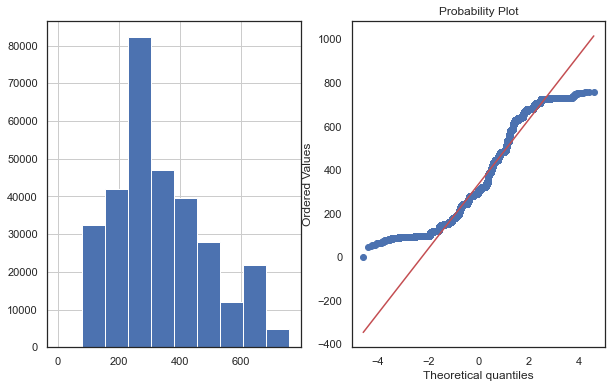

In [213]:
plot_data(x_train,'checkout_price')

In [214]:
scaler_price=StandardScaler()
x_train['price_scaled']=scaler_price.fit_transform(x_train.checkout_price.to_numpy().reshape(-1,1))#scaling the checkout price

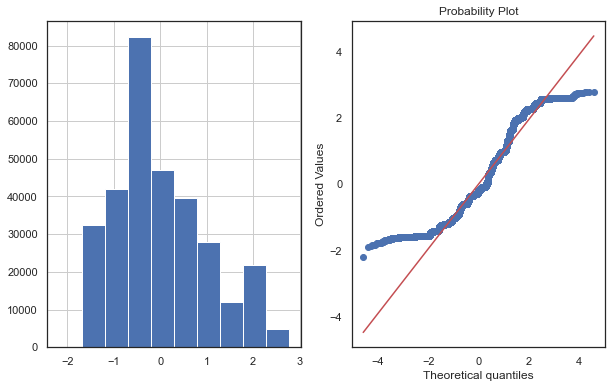

In [215]:
plot_data(x_train,'price_scaled')

In [220]:
x_train.drop('checkout_price',axis=1,inplace=True)

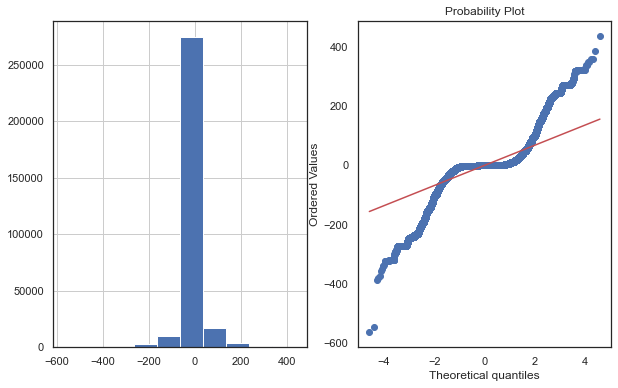

In [216]:
plot_data(x_train,'compare_price')

In [217]:
x_train.drop('compare_price',axis=1,inplace=True)#dropping the compare price

### Feature Selection

In [221]:
x_train.nunique()

emailer_for_promotion       2
homepage_featured           2
num_orders                250
discount_given              2
590                         2
526                         2
638                         2
region_code_23              2
region_code_34              2
region_code_56              2
region_code_71              2
region_code_77              2
region_code_85              2
region_code_93              2
center_type_TYPE_A          2
center_type_TYPE_C          2
category_Beverages          2
category_Biryani            2
category_Desert             2
category_Extras             2
category_Other Snacks       2
category_Pasta              2
category_Pizza              2
category_Rice Bowl          2
category_Salad              2
category_Sandwich           2
category_Seafood            2
category_Soup               2
category_Starters           2
cuisine_Indian              2
cuisine_Italian             2
cuisine_Thai                2
quarter_Q1                  2
quarter_Q2

#### Filter Method

In [222]:
correlation=x_train.corr()['num_orders']
correlation

emailer_for_promotion    0.170663
homepage_featured        0.202151
num_orders               1.000000
discount_given           0.076203
590                      0.061033
526                     -0.038717
638                      0.038480
region_code_23          -0.000852
region_code_34          -0.073747
region_code_56           0.104325
region_code_71           0.014198
region_code_77          -0.045817
region_code_85           0.019815
region_code_93          -0.019251
center_type_TYPE_A       0.004452
center_type_TYPE_C      -0.084688
category_Beverages       0.127490
category_Biryani        -0.183072
category_Desert         -0.177105
category_Extras          0.060229
category_Other Snacks   -0.065762
category_Pasta          -0.180032
category_Pizza          -0.005943
category_Rice Bowl       0.279007
category_Salad           0.142092
category_Sandwich        0.199425
category_Seafood        -0.127230
category_Soup           -0.101953
category_Starters       -0.070984
cuisine_Indian

In [223]:
high_corr=correlation[(abs(correlation)>0.1)]
high_corr.drop('num_orders', axis=0, inplace=True)#dropping the target
high_corr

emailer_for_promotion    0.170663
homepage_featured        0.202151
region_code_56           0.104325
category_Beverages       0.127490
category_Biryani        -0.183072
category_Desert         -0.177105
category_Pasta          -0.180032
category_Rice Bowl       0.279007
category_Salad           0.142092
category_Sandwich        0.199425
category_Seafood        -0.127230
category_Soup           -0.101953
cuisine_Indian          -0.122236
cuisine_Italian          0.207257
operation_VLong          0.112009
price_scaled            -0.327292
Name: num_orders, dtype: float64

In [224]:
features = list(high_corr.index)#getting the features

print(features)

['emailer_for_promotion', 'homepage_featured', 'region_code_56', 'category_Beverages', 'category_Biryani', 'category_Desert', 'category_Pasta', 'category_Rice Bowl', 'category_Salad', 'category_Sandwich', 'category_Seafood', 'category_Soup', 'cuisine_Indian', 'cuisine_Italian', 'operation_VLong', 'price_scaled']


<AxesSubplot:>

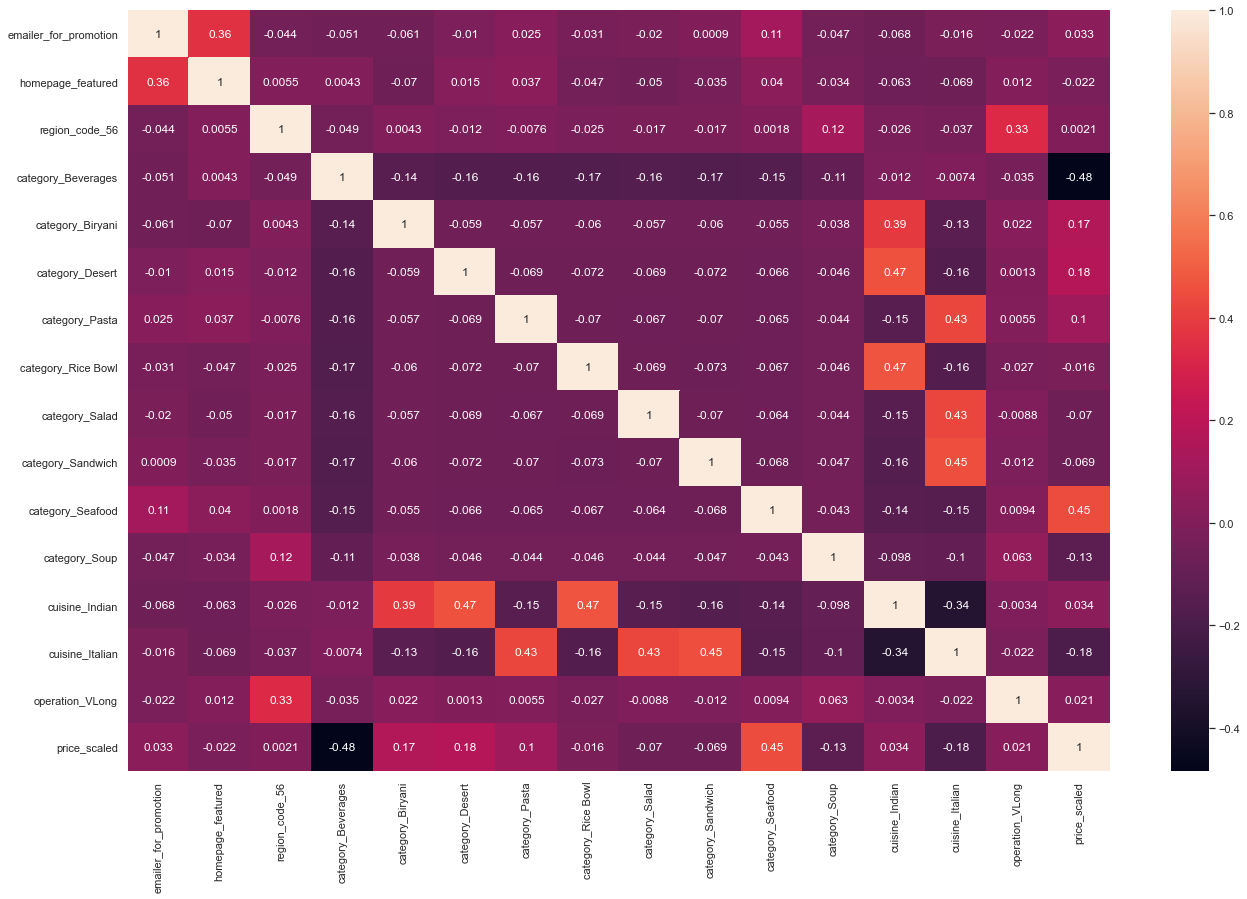

In [225]:
plt.figure(figsize=(22,14))
sns.heatmap(x_train[features].corr(),annot=True)

#### Embedded Method

In [226]:
from sklearn.ensemble import RandomForestRegressor

In [227]:
def tree_based_feature_importance(x_train,y_train):
    # create the random forest model
    model = RandomForestRegressor(n_estimators=120)

    # fit the model to start training.
    model.fit(x_train, y_train)

    # get the importance of the resulting features.
    importances = model.feature_importances_

    # create a data frame for visualization.
    final_df = pd.DataFrame({"Features": x_train.columns, "Importances":importances})
    final_df.set_index('Importances')

    # sort in descending order 
    final_df = final_df.sort_values('Importances',ascending=False)
    
    #visualising feature importance
    pd.Series(model.feature_importances_, index=x_train.columns).nlargest(6).plot(kind='barh')  
    return final_df

In [228]:
x=x_train.copy()
x.drop('num_orders',axis=1,inplace=True)

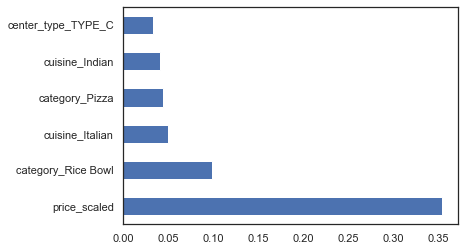

In [229]:
feature_importance=tree_based_feature_importance(x,np.log(y_train))

In [230]:
feature_importance

,Features,Importances
51,price_scaled,0.354654
22,category_Rice Bowl,0.098778
29,cuisine_Italian,0.049841
21,category_Pizza,0.044004
28,cuisine_Indian,0.040293
14,center_type_TYPE_C,0.032948
20,category_Pasta,0.029839
15,category_Beverages,0.029090
1,homepage_featured,0.022383
16,category_Biryani,0.020278


In [294]:
features_e=feature_importance[feature_importance['Importances'] > 0.004]['Features'].to_list()
features_e#features

['price_scaled',
 'category_Rice Bowl',
 'cuisine_Italian',
 'category_Pizza',
 'cuisine_Indian',
 'center_type_TYPE_C',
 'category_Pasta',
 'category_Beverages',
 'homepage_featured',
 'category_Biryani',
 'emailer_for_promotion',
 'operation_VLong',
 'discount_given',
 'operation_Medium',
 'center_type_TYPE_A',
 'operation_Short',
 'region_code_56',
 590,
 'category_Soup',
 'year_Y2',
 'year_Y1',
 'operation_Long',
 'region_code_85',
 526,
 'region_code_34',
 'category_Sandwich',
 'region_code_77',
 'quarter_Q3',
 'quarter_Q2',
 'quarter_Q1',
 'category_Salad',
 'month_April',
 'month_Jan',
 'month_July',
 'month_May',
 'month_Aug',
 'month_Nov',
 'month_Dec',
 'month_Sept',
 'month_Feb',
 'month_Mar',
 'month_Oct']

In [295]:
abs(x_train[features_e].corr())[abs(x_train[features_e].corr())>0.5]#finding multicollinear features

,price_scaled,category_Rice Bowl,cuisine_Italian,category_Pizza,cuisine_Indian,center_type_TYPE_C,category_Pasta,category_Beverages,homepage_featured,category_Biryani,...,month_Jan,month_July,month_May,month_Aug,month_Nov,month_Dec,month_Sept,month_Feb,month_Mar,month_Oct
price_scaled,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_Rice Bowl,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_Italian,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_Pizza,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_Indian,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
center_type_TYPE_C,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_Pasta,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_Beverages,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homepage_featured,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category_Biryani,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

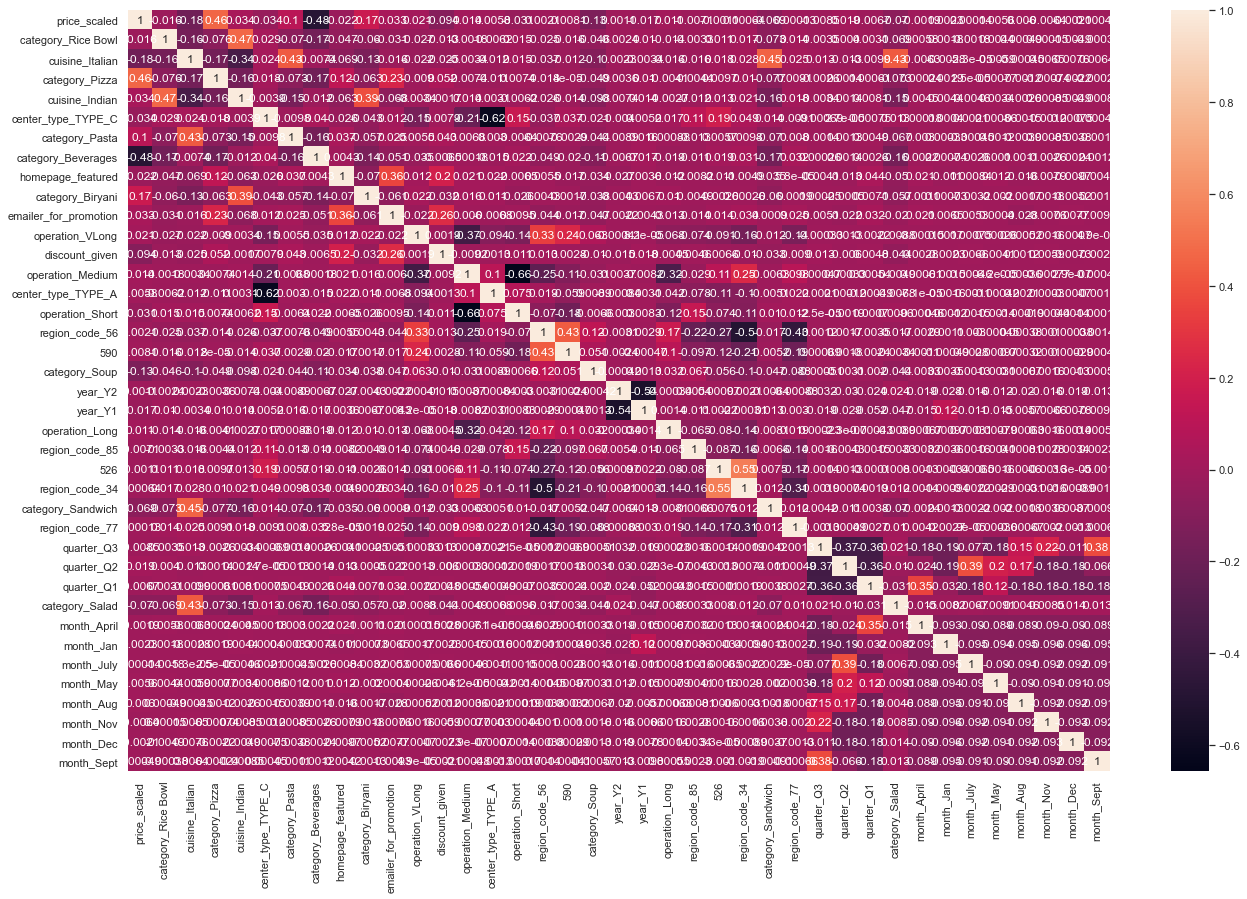

In [279]:
plt.figure(figsize=(22,14))
sns.heatmap(x_train[features_e].corr(),annot=True)

In [296]:
#removing multicollinear features
features_e.remove('center_type_TYPE_A')
features_e.remove('operation_Short')
features_e.remove('year_Y1')
features_e.remove('region_code_34')

In [297]:
#recreating features in validation set
x_val1=x_val.copy()
for label in top_3_cities:
    x_val1[label]=np.where(x_val1['city_code']==label,1,0)
x_val1[['city_code']+top_3_cities].head(20)# one hot encoding the top 5 cities mostly ordered from
x_val1['price_scaled']=scaler_price.transform(x_val1.checkout_price.to_numpy().reshape(-1,1))#scaling the checkout price
bin_range=[0,2,3.5,5,6,7.5]
x_val1['operation']=pd.cut(np.array(x_val1['op_area']),bins=bin_range,labels=['VShort','Short','Medium','Long','VLong'])
x_val1=pd.get_dummies(x_val1,columns=['region_code','center_type','category','cuisine','quarter','year','month','operation'])

In [298]:
x_train1=x_train[features_e]

In [299]:
x_val1=x_val1[features_e]

### Modelling

In [307]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

#### Linear Regression

In [300]:
reg = LinearRegression()
reg.fit(x_train1,y_train)

y_train_pred = reg.predict(x_train1)
print('Train Score :',reg.score(x_train1,y_train))
r2train1=r2_score(y_train,y_train_pred)
print('R2 for train set',r2train1)
print("Train set rmse : ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Train set mse : ", (mean_squared_error(y_train, y_train_pred)))


y_pred=reg.predict(x_val1)
r2val1=r2_score(y_val,y_pred)
print('\nVal Score :',reg.score(x_val1,y_val))
print('R2 for val set',r2val1)
print("Validation set rmse : ", np.sqrt(mean_squared_error(y_val, y_pred)))
print("Validation set mse : ", (mean_squared_error(y_val, y_pred)))

Train Score : 0.4872234805354604
R2 for train set 0.4872234805354604
Train set rmse :  159.22570357201286
Train set mse :  25352.824678002507

Val Score : 0.48761145055794153
R2 for val set 0.48761145055794153
Validation set rmse :  159.01489989337335
Validation set mse :  25285.73838809955


In [263]:
pd.DataFrame(y_pred).describe()# we are getting negative values in the number of orders as the target column is right skewed

,0
count,66382.000000
mean,213.553215
std,151.347555
min,-141.230352
25%,93.875032
50%,197.854275
75%,327.587336
max,761.283247


In [289]:
y_train2=np.log(y_train)
y_val2=np.log(y_val)#log transforming the target to avoid having negative values

In [290]:
linearmodel=LinearRegression()
reg.fit(x_train1,y_train2)

y_train_pred = reg.predict(x_train1)
print('Train Score :',reg.score(x_train1,y_train2))
r2train1=r2_score(y_train2,y_train_pred)
print('R2 for train set',r2train1)
print("Train set RMSLE : ", np.sqrt(mean_squared_error(y_train2, y_train_pred)))
print("Train set RMSE : ", np.sqrt(mean_squared_error(y_train, np.exp(y_train_pred))))
print("Train set MSE : ", mean_squared_error(y_train, np.exp(y_train_pred)))

y_pred=reg.predict(x_val1)
print('\nTest Score :',reg.score(x_val1,y_val2))
r2val1=r2_score(y_val2,y_pred)
print('R2 for val set',r2val1)
print("Validation set RMSLE : ", np.sqrt(mean_squared_error(y_val2, y_pred)))
print("Validation set RMSE : ", np.sqrt(mean_squared_error(y_val, np.exp(y_pred))))
print("Validation set MSE : ", mean_squared_error(y_val, np.exp(y_pred)))

Train Score : 0.6065704024311119
R2 for train set 0.6065704024311119
Train set RMSLE :  0.720781097844796
Train set RMSE :  160.27182725094806
Train set MSE :  25687.058610357737

Test Score : 0.607207027898123
R2 for val set 0.607207027898123
Validation set RMSLE :  0.722040350621782
Validation set RMSE :  160.08142715060342
Validation set MSE :  25626.063318573953


In [266]:
pd.DataFrame(np.exp(y_pred)).describe()# no more negative values in prediction

,0
count,66382.000000
mean,171.764406
std,144.699698
min,13.559096
25%,60.256654
50%,124.645563
75%,241.254749
max,1880.465641


#### KNN

In [246]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train1, y_train2)

y_train_pred = knn.predict(x_train1)
r2train=r2_score(y_train2,y_train_pred)

print('R2 for train set',r2train)
print("Train set rmsle : ", np.sqrt(mean_squared_error(y_train2, y_train_pred)))
print("Train set rmse : ", np.sqrt(mean_squared_error(y_train, np.exp(y_train_pred))))
print("Train set mse : ", (mean_squared_error(y_train, np.exp(y_train_pred))))

y_pred = knn.predict(x_val1)
r2val=r2_score(y_val2,y_pred)


print('R2 for Val set',r2val)
print("Val set rmsle : ", np.sqrt(mean_squared_error(y_val2, y_pred)))
print("Val set rmse : ", np.sqrt(mean_squared_error(y_val, np.exp(y_pred))))
print("Val set mse : ", (mean_squared_error(y_val, np.exp(y_pred))))

R2 for train set 0.7184926656809425
Train set rmsle :  0.6096979457996654
Train set rmse :  128.4577162330811
R2 for Val set 0.7184926656809425
Val set rmsle :  0.652260622564446
Val set rmse :  139.22054459868826


#### RandomForest

In [247]:
model = RandomForestRegressor(n_estimators =600, random_state = 0,min_samples_leaf=2) 
#model fitting
model.fit(x_train1,y_train2)

y_train_pred = model.predict(x_train1)

print("Train set rmsle : ", np.sqrt(mean_squared_error(y_train2, y_train_pred)))
print("Train set rmse : ", np.sqrt(mean_squared_error(y_train, np.exp(y_train_pred))))
print("Train set mse : ", mean_squared_error(y_train, np.exp(y_train_pred)))
r2train=r2_score(y_train2,y_train_pred)
print('R2 for train set',r2train)

y_pred=model.predict(x_val1)
print("Val set rmsle : ", np.sqrt(mean_squared_error(y_val2, y_pred)))
print("Val set rmse : ", np.sqrt(mean_squared_error(y_val, np.exp(y_pred))))
print("Val set mse : ", mean_squared_error(y_val, np.exp(y_pred)))
r2val=r2_score(y_val2,y_pred)
print('R2 for Val set',r2val)

Train set rmsle :  0.5605476511436172
Train set rmse :  117.08527203356431
Train set mse :  13708.960927173755
R2 for train set 0.7620502105111349
Val set rmsle :  0.6277720372477309
Val set rmse :  137.14765744785745
Val set mse :  18809.47994343485
R2 for Val set 0.7030764077967915


#### LightGBM

In [301]:
LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.3,
        num_leaves =80,
        metric= 'rmse',
        random_state=100)


LGB.fit(x_train1, y_train2)
LGBpred_train=LGB.predict(x_train1)
print('RMSLE train:',np.sqrt(mean_squared_error(y_train2,LGBpred_train)))
print('RMSE train:',np.sqrt(mean_squared_error(y_train,np.exp(LGBpred_train))))
print('MSE train:',(mean_squared_error(y_train,np.exp(LGBpred_train))))
print(f'R^2 score for train:', {LGB.score(x_train1, y_train2)})
LGBpred=LGB.predict(x_val1)
print("\nRMSLE val :",np.sqrt(mean_squared_error(y_val2,LGBpred)))
print("RMSE val :",np.sqrt(mean_squared_error(y_val,np.exp(LGBpred))))
print("MSE val :",(mean_squared_error(y_val,np.exp(LGBpred))))
print(f'R^2 score for validation:', {LGB.score(x_val1,y_val2)})

RMSLE train: 0.5802922486343857
RMSE train: 124.08590073955015
MSE train: 15397.310762345493
R^2 score for train: {0.7449920091264562}

RMSLE val : 0.5919567836375321
RMSE val : 125.56785001196663
MSE val : 15767.284956627747
R^2 score for validation: {0.7359897578282868}


#### XGBoost

In [302]:
xgb = XGBRegressor(max_depth = 8,
    learning_rate=0.2,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 3)

xgb.fit(x_train1, y_train2)
print('Train Score :',xgb.score(x_train1, y_train2))
print('Test Score :',xgb.score(x_val1,y_val2))
pred=xgb.predict(x_train1)
print("RMSLE train :",np.sqrt(mean_squared_error(y_train2,pred)))
print("RMSE train :",np.sqrt(mean_squared_error(y_train,np.exp(pred))))
print("MSE train :",(mean_squared_error(y_train,np.exp(pred))))


predictions = xgb.predict(x_val1)
print("\nRMSLE :",np.sqrt(mean_squared_error(y_val2,predictions)))
print("RMSE :",np.sqrt(mean_squared_error(y_val,np.exp(predictions))))
print("MSE :",(mean_squared_error(y_val,np.exp(predictions))))

[17:50:04] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:50:04] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Train Score : 0.7534084148951443
Test Score : 0.738692441251023
RMSLE train : 0.5706357819318764
RMSE train : 122.10729120918022
MSE train : 14910.190566443542

Explained Variance : 0.63869242179038
RMSLE : 0.5889190466285742
RMSE : 125.33918269709372
MSE : 15709.91071917544


#### CATBoost

In [303]:
CGB=CatBoostRegressor(learning_rate=0.3,loss_function='RMSE',max_depth=4,verbose=False)

CGB.fit(x_train1, y_train2)
CGBpred_train=CGB.predict(x_train1) 
print('Train Score :',CGB.score(x_train1, y_train2))
print("RMSLE train :",np.sqrt(mean_squared_error(y_train2,CGBpred_train)))
print("RMSE train :",np.sqrt(mean_squared_error(y_train,np.expm1(CGBpred_train))))
print("MSE train :",(mean_squared_error(y_train,np.expm1(CGBpred_train))))

print('\nTest Score :',CGB.score(x_val1,y_val2))
CGBpred=CGB.predict(x_val1) 
print("RMSLE :",np.sqrt(mean_squared_error(y_val2,CGBpred)))
print("RMSE :",np.sqrt(mean_squared_error(y_val,np.expm1(CGBpred))))
print("MSE :",(mean_squared_error(y_val,np.expm1(CGBpred))))

Train Score : 0.730873220920478
RMSLE train : 0.596140093716026
RMSE train : 129.13151889091245
MSE train : 16674.949171074077

Test Score : 0.72769054282052
RMSLE : 0.6011889316403277
RMSE : 129.60625853332158
MSE : 16797.782251006192


#### Test Set Evaluation

In [304]:
x_test1=x_test.copy()
for label in top_3_cities:
    x_test1[label]=np.where(x_test1['city_code']==label,1,0)
bin_range=[0,2,3.5,5,6,7.5]
x_test1['operation']=pd.cut(np.array(x_test1['op_area']),bins=bin_range,labels=['VShort','Short','Medium','Long','VLong'])
x_test1['price_scaled']=scaler_price.transform(x_test1.checkout_price.to_numpy().reshape(-1,1))#scaling the checkout price
x_test1=pd.get_dummies(x_test1,columns=['region_code','center_type','category','cuisine','quarter','year','month','operation'])

In [305]:
x_test1=x_test1[features_e]

In [306]:
y_test2=np.log(y_test)

In [325]:
algo=[]
mse=[]
rmse=[]
mae=[]

In [315]:
linearmodel=LinearRegression()
reg.fit(x_train1,y_train2)
algo.append('Linear Regression')
# y_train_pred = reg.predict(x_train1)
# print('Train Score :',reg.score(x_train1,y_train2))
# r2train1=r2_score(y_train2,y_train_pred)
# print('R2 for train set',r2train1)
# print("Train set RMSLE : ", np.sqrt(mean_squared_error(y_train2, y_train_pred)))
# print("Train set RMSE : ", np.sqrt(mean_squared_error(y_train, np.exp(y_train_pred))))
# print("Train set MSE : ", mean_squared_error(y_train, np.exp(y_train_pred)))

y_pred=reg.predict(x_test1)
print('\nTest Score :',reg.score(x_test1,y_test2))
r2val1=r2_score(y_test2,y_pred)
mse.append(mean_squared_error(y_test, np.exp(y_pred)))
rmse.append(np.sqrt(mean_squared_error(y_test, np.exp(y_pred))))
mae.append(mean_absolute_error(y_test,np.exp(y_pred)))
print('R2 for Test set',r2val1)
print("Test set RMSLE : ", np.sqrt(mean_squared_error(y_test2, y_pred)))
print("Test set RMSE : ", np.sqrt(mean_squared_error(y_test, np.exp(y_pred))))
print("Test set MSE : ", mean_squared_error(y_test, np.exp(y_pred)))
print('Test set MAE:', mean_absolute_error(y_test,np.exp(y_pred)))


Test Score : 0.6011848636202735
R2 for Test set 0.6011848636202735
Test set RMSLE :  0.7229359572297885
Test set RMSE :  159.56151620821575
Test set MSE :  25459.877454664696
Test set MAE: 99.11523094459793


In [316]:
knn=KNeighborsRegressor(n_neighbors=7)
knn.fit(x_train1, y_train2)
algo.append('KNN')
# y_train_pred = knn.predict(x_train1)
# r2train=r2_score(y_train2,y_train_pred)

# print('R2 for train set',r2train)
# print("Train set rmsle : ", np.sqrt(mean_squared_error(y_train2, y_train_pred)))
# print("Train set rmse : ", np.sqrt(mean_squared_error(y_train, np.exp(y_train_pred))))
# print("Train set mse : ", (mean_squared_error(y_train, np.exp(y_train_pred))))

y_pred = knn.predict(x_test1)
r2test=r2_score(y_test2,y_pred)

mse.append(mean_squared_error(y_test, np.exp(y_pred)))
rmse.append(np.sqrt(mean_squared_error(y_test, np.exp(y_pred))))
mae.append(mean_absolute_error(y_test,np.exp(y_pred)))
print('R2 for Test set',r2test)
print("Test set rmsle : ", np.sqrt(mean_squared_error(y_test2, y_pred)))
print("Test set rmse : ", np.sqrt(mean_squared_error(y_test, np.exp(y_pred))))
print("Test set mse : ", (mean_squared_error(y_test, np.exp(y_pred))))
print('Test set MAE:', mean_absolute_error(y_test,np.exp(y_pred)))

R2 for Test set 0.685229603766754
Test set rmsle :  0.642260111049348
Test set rmse :  134.58934569904625
Test set mse :  18114.29197569738
Test set MAE: 84.84796401334775


In [317]:
model = RandomForestRegressor(n_estimators =600, random_state = 0,min_samples_leaf=2) 
#model fitting
model.fit(x_train1,y_train2)
algo.append('RandomForest')
#y_train_pred = model.predict(x_train1)

# print("Train set rmsle : ", np.sqrt(mean_squared_error(y_train2, y_train_pred)))
# print("Train set rmse : ", np.sqrt(mean_squared_error(y_train, np.exp(y_train_pred))))
# print("Train set mse : ", mean_squared_error(y_train, np.exp(y_train_pred)))
# r2train=r2_score(y_train2,y_train_pred)
# print('R2 for train set',r2train)

y_pred=model.predict(x_test1)
mse.append(mean_squared_error(y_test, np.exp(y_pred)))
rmse.append(np.sqrt(mean_squared_error(y_test, np.exp(y_pred))))
mae.append(mean_absolute_error(y_test,np.exp(y_pred)))
print("Test set rmsle : ", np.sqrt(mean_squared_error(y_test2, y_pred)))
print("Test set rmse : ", np.sqrt(mean_squared_error(y_test, np.exp(y_pred))))
print("Test set mse : ", mean_squared_error(y_test, np.exp(y_pred)))
r2val=r2_score(y_test2,y_pred)
print('R2 for test set',r2val)

Test set rmsle :  0.6070852931425615
Test set rmse :  125.19864719352252
Test set mse :  15674.701259088122
R2 for test set 0.7187636811401656


In [319]:
xgb = XGBRegressor(max_depth = 8,
    learning_rate=0.2,
        silent= 1, 
        objective= 'reg:linear',  
        eval_metric= 'rmse',
        seed= 3)
algo.append('XGBoost')

xgb.fit(x_train1, y_train2)
# print('Train Score :',xgb.score(x_train1, y_train2))
# print('Test Score :',xgb.score(x_test1,y_test2))
# pred=xgb.predict(x_train1)
# print("RMSLE train :",np.sqrt(mean_squared_error(y_train2,pred)))
# print("RMSE train :",np.sqrt(mean_squared_error(y_train,np.expm1(pred))))
# print("MSE train :",(mean_squared_error(y_train,np.expm1(pred))))

predictions = xgb.predict(x_test1)
mse.append(mean_squared_error(y_test, np.exp(predictions)))
rmse.append(np.sqrt(mean_squared_error(y_test, np.exp(predictions))))
mae.append(mean_absolute_error(y_test,np.exp(predictions)))
print("RMSLE Test:",np.sqrt(mean_squared_error(y_test2,predictions)))
print("RMSE Test:",np.sqrt(mean_squared_error(y_test,np.expm1(predictions))))
print("MSE Test:",(mean_squared_error(y_test,np.expm1(predictions))))
print('MAE test: ',mean_absolute_error(y_test,np.exp(predictions)))

[19:45:50] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[19:45:50] WARNING: ..\src\learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


RMSLE Test: 0.5903043665758676
RMSE Test: 125.80373250949997
MSE Test: 125.80373250949997
MAE test:  78.24034018726435


In [320]:
LGB=LGBMRegressor(boosting_type='gbdt',
        objective='regression',
        max_depth=9,
        learning_rate = 0.3,
        num_leaves =80,
        metric= 'rmse',
        random_state=100)
algo.append('LGBm')


LGB.fit(x_train1, y_train2)
# LGBpred_train=LGB.predict(x_train1)
# print('RMSLE train:',np.sqrt(mean_squared_error(y_train2,LGBpred_train)))
# print('RMSE train:',np.sqrt(mean_squared_error(y_train,np.exp(LGBpred_train))))
# print('MSE train:',(mean_squared_error(y_train,np.exp(LGBpred_train))))
# print(f'R^2 score for train:', {LGB.score(x_train1, y_train2)})
LGBpred=LGB.predict(x_test1)
mse.append(mean_squared_error(y_test,np.exp(LGBpred)))
rmse.append(np.sqrt(mean_squared_error(y_test,np.exp(LGBpred))))
mae.append(mean_absolute_error(y_test,np.exp(LGBpred)))
print("\nRMSLE Test :",np.sqrt(mean_squared_error(y_test2,LGBpred)))
print("RMSE Test :",np.sqrt(mean_squared_error(y_test,np.exp(LGBpred))))
print("MSE Test :",(mean_squared_error(y_test,np.exp(LGBpred))))
print('MAE test:',mean_absolute_error(y_test,np.exp(LGBpred)))
print(f'R^2 score for Test:', {LGB.score(x_test1,y_test2)})


RMSLE Test : 0.5939615820986771
RMSE Test : 126.14440460337345
MSE Test : 15912.410812739585
MAE test: 78.77947306604621
R^2 score for Test: {0.7307915476057747}


In [331]:
CGB=CatBoostRegressor(learning_rate=0.3,loss_function='RMSE',max_depth=4,verbose=False)
algo.append('CatBoost')
CGB.fit(x_train1, y_train2)
# CGBpred_train=CGB.predict(x_train1) 
# print('Train Score :',CGB.score(x_train1, y_train2))
# print("RMSLE train :",np.sqrt(mean_squared_error(y_train2,CGBpred_train)))
# print("RMSE train :",np.sqrt(mean_squared_error(y_train,np.expm1(CGBpred_train))))
# print("MSE train :",(mean_squared_error(y_train,np.expm1(CGBpred_train))))

print('\nTest Score :',CGB.score(x_test1,y_test2))
CGBpred=CGB.predict(x_test1)
mse.append(mean_squared_error(y_test,np.exp(CGBpred)))
rmse.append(np.sqrt(mean_squared_error(y_test,np.exp(CGBpred))))
mae.append(mean_absolute_error(y_test,np.exp(CGBpred)))
print("RMSLE :",np.sqrt(mean_squared_error(y_test2,CGBpred)))
print("RMSE :",np.sqrt(mean_squared_error(y_test,np.exp(CGBpred))))
print("MSE :",(mean_squared_error(y_test,np.exp(CGBpred))))
print('MAE:',mean_absolute_error(y_test,np.exp(CGBpred)))


Test Score : 0.7228445860449031
RMSLE : 0.6026646149996255
RMSE : 129.61685712362174
MSE : 16800.529650605375
MAE: 80.8160896264436


#### Scores

In [322]:
for i in range(len(mse)):
    mse[i]=round(mse[i],3)
    rmse[i]=round(rmse[i],3)
    mae[i]=round(mae[i],3)

In [323]:
scores = pd.DataFrame(list(zip(algo, mse, rmse, mae)), columns = ['Algorithm', 'MSE_Score', 'RMSE_Score','MAE_Score'])

In [349]:
scores

,Algorithm,MSE_Score,RMSE_Score,MAE_Score
0,Linear Regression,25459.877,159.562,99.115
1,KNN,18114.292,134.589,84.848
2,RandomForest,15674.701,125.199,78.620
3,XGBoost,15772.114,125.587,78.240
4,LGBm,15912.411,126.144,78.779
5,CatBoost,16800.530,129.617,80.816
